<a href="https://colab.research.google.com/github/shyamsgadekar/Netflix-Movies-And-TV-Shows-Clustering/blob/main/Netflix_Movies%26TV_Shows_Clustering_shyam_gadekar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And TV Shows Clustering

---------------------------

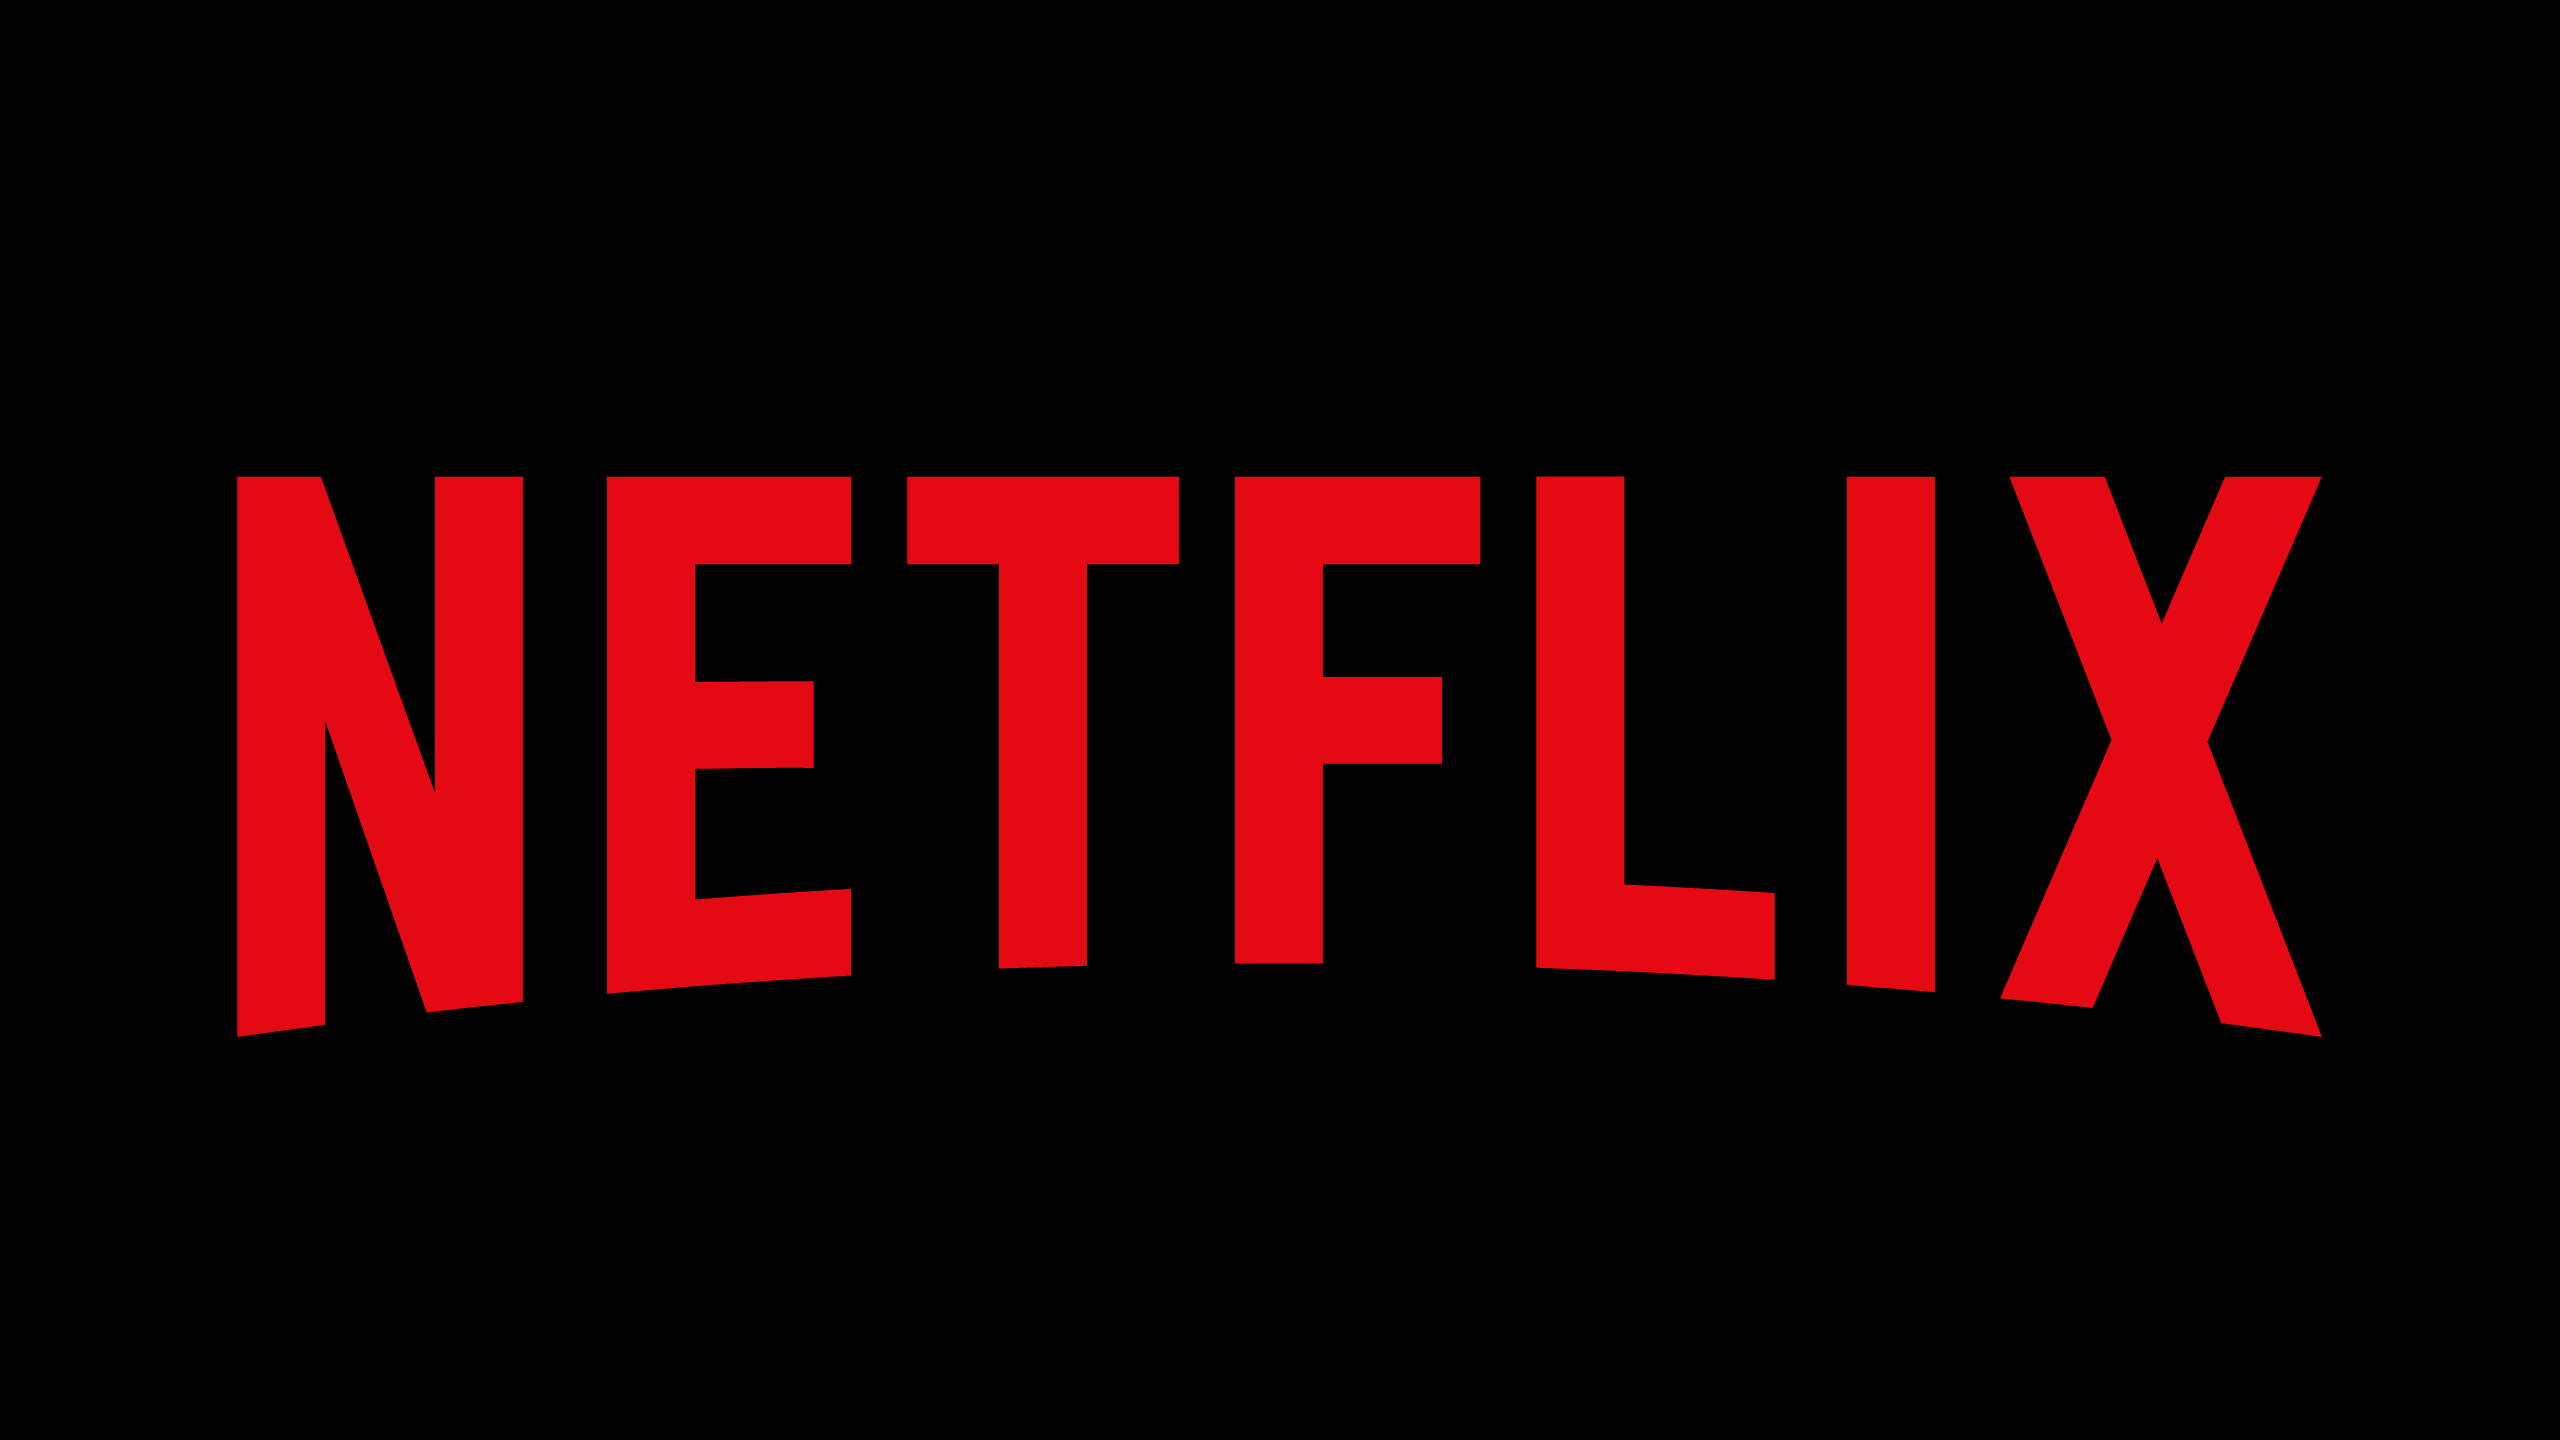

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual (shyam gadekar)

# **Project Summary -**

Netflix uses a data analysis and machine learning technique called clustering to group their vast collection of movies and TV shows into similar categories. This approach involves analyzing various characteristics of each title, including cast, genre, and plot, and using algorithms to identify patterns and similarities between them. By doing so, Netflix can offer personalized recommendations to users based on their viewing history and preferences, which can increase user satisfaction and retention.

To accomplish this, Netflix collects and analyzes data on various features of each title and then uses unsupervised machine learning algorithms like k-means, hierarchical clustering, and PCA to group them into distinct categories or genres. By doing so, they can provide personalized content recommendations to users using cosine similarity scores.

The primary goal of this clustering is to enhance the user experience on Netflix and improve engagement and satisfaction, which can ultimately lead to increased revenue for the company. Additionally, clustering analysis and the recommender system can help Netflix make data-driven decisions about content production and licensing by understanding underlying trends and patterns in user behavior. This can help increase customer retention and improve overall revenue for the company.





# **GitHub Link -**

https://github.com/shyamsgadekar/Netflix-Movies-And-TV-Shows-Clustering

# **Problem Statement**


**Business Context**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from
Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows
that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies
has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be
interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide
many interesting findings.

In this project, we are gonna do,

* Exploratory Data Analysis
* Understanding what type content is available in different countries
* If Netflix has been increasingly focusing on TV rather than movies in recent years.

* Clustering similar content by matching text-based features

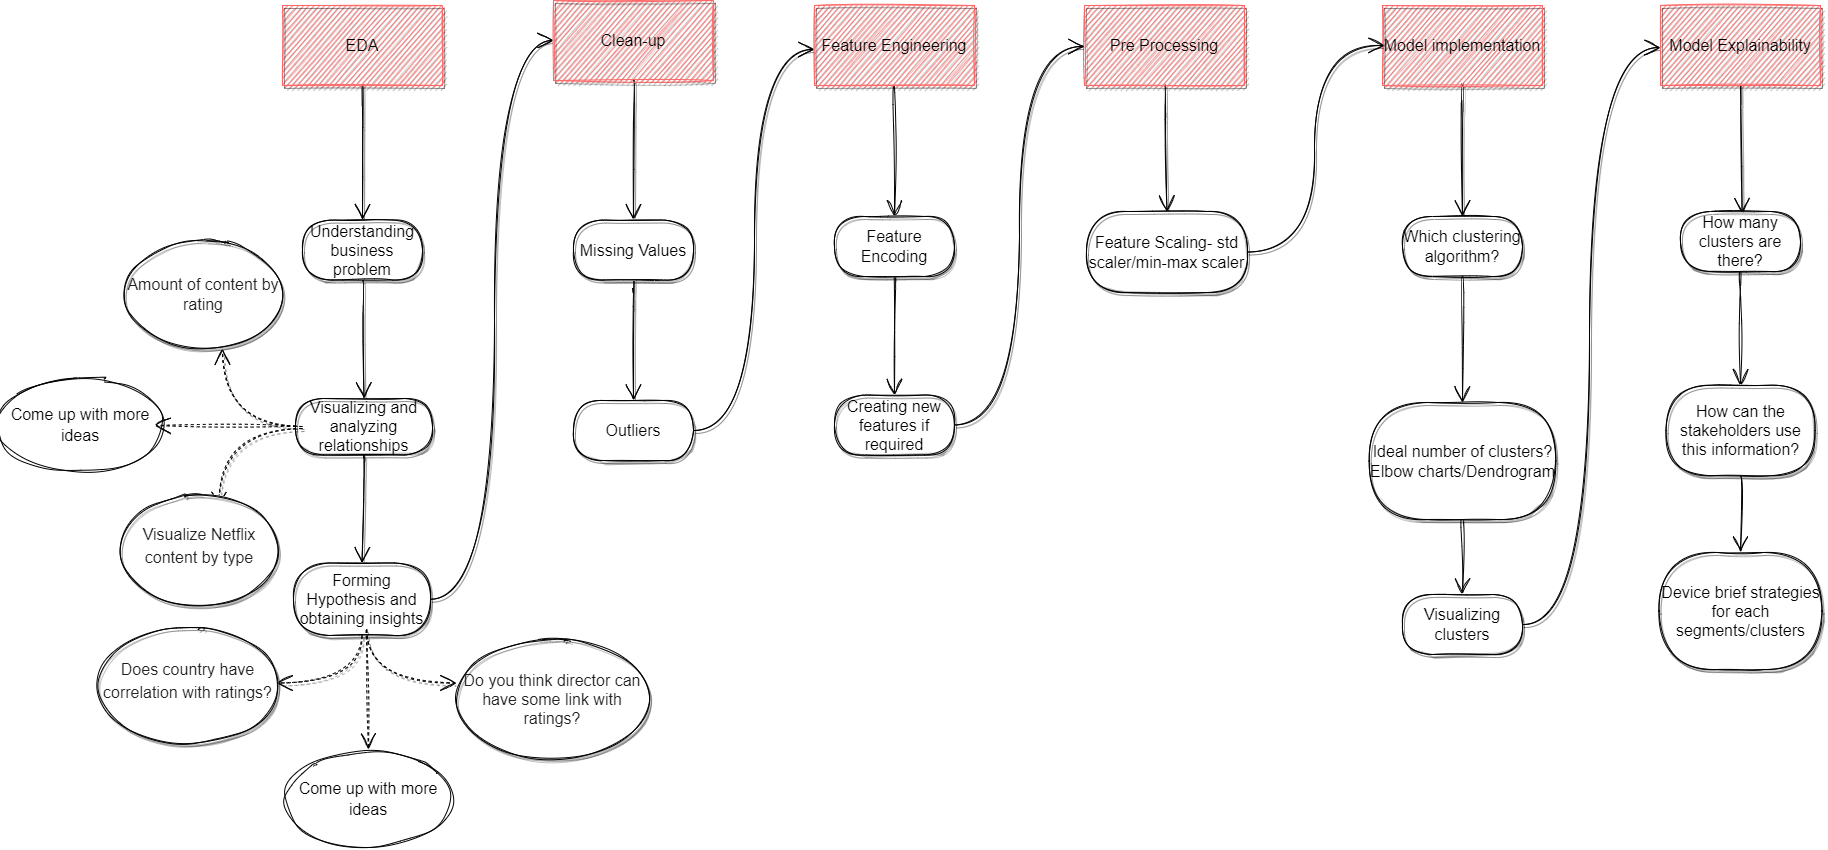

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries



In [1]:
# Importing Libraries

import pandas as pd     #data manipulation and analysis.
import numpy as np      #numerical computing
import matplotlib.pyplot as plt   #data visualization
import seaborn as sns
import missingno as msno   #convenient way to visualize missing data 

import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

from sklearn import preprocessing  #scaling and normalization.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer    # extracting features from text data
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords     #tokenization, stemming, and stopword removal
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Dataset
dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/4.4_Netflix_Movies_And_TV_Shows_Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


### Dataset First View

In [4]:
# Dataset First Look
dt.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dt.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dt.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dt.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

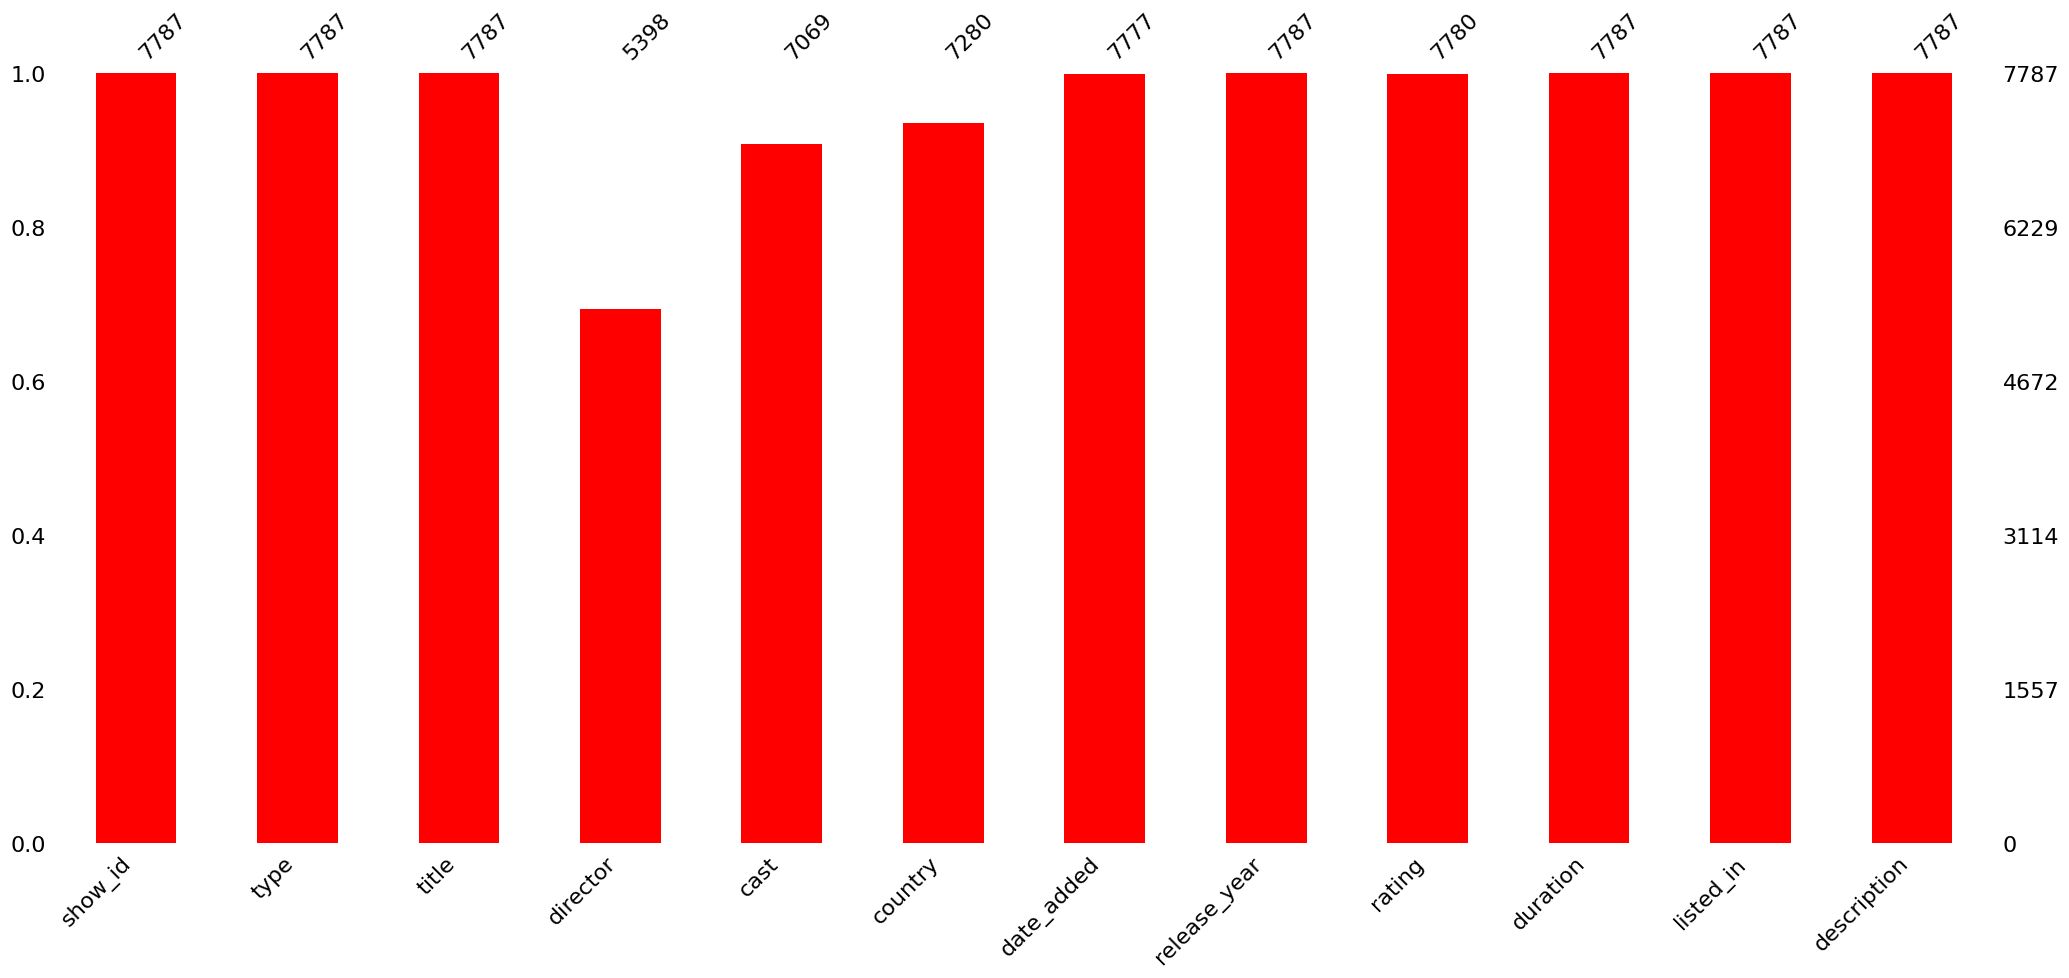

In [9]:
# Visualize missing values
msno.bar(dt, color='red')




Based on the analysis of the dataset, it appears that most of the columns do not have any missing or null values. However, there are some columns that have missing values, including

- Director (2389)
- Cast (718)
- Country (507)
- Date_added (10)
- Rating (7) 

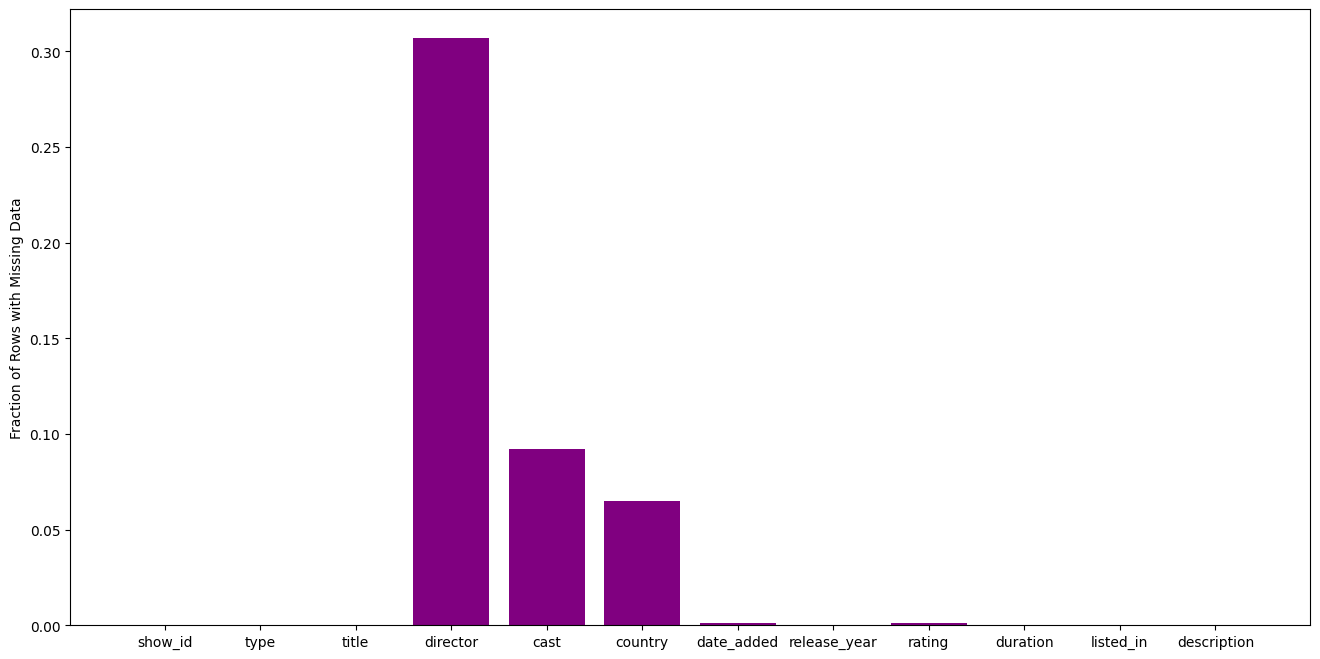

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculating null value distribution
null_counts = dt.isnull().sum() / len(dt)

# Create bar plot of null value distribution
fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(np.arange(len(null_counts)), null_counts, color='purple')
ax.set_xticks(np.arange(len(null_counts)))
ax.set_xticklabels(null_counts.index, rotation='horizontal')
ax.set_ylabel('Fraction of Rows with Missing Data')
plt.show()

### What did you know about your dataset?

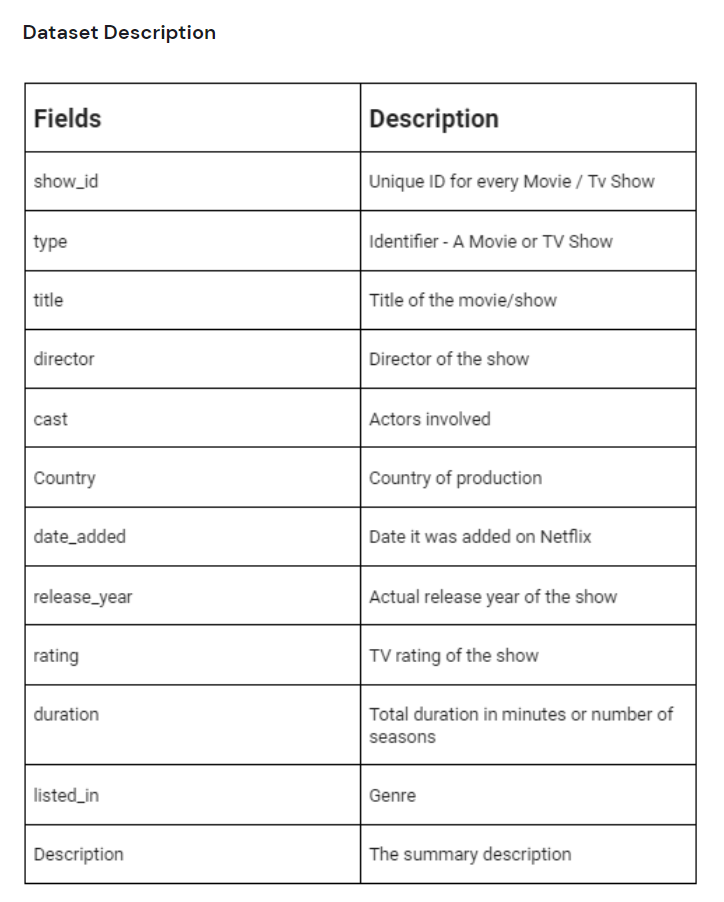

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dt.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
dt.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

Since only the "Release_Date" column is numerical and the rest are strings, using the "describe" method would not be informative in this case.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
dt.show_id.value_counts()

s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64

Unique id for *every* row

In [14]:
dt.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

There are two types movie and tv show

In [15]:
dt.title.value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

In [16]:
dt.director.value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [17]:
dt.cast.value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [18]:
dt['cast'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

cast is a list but is given as string

In [19]:
dt.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

By analyzing the data, it is apparent that the majority of the movies or shows in the dataset are produced in the United States, followed by India, the United Kingdom, Japan, and South Korea.

In [20]:
dt.release_year.value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

From the analysis of the data, it is evident that a large number of movies were released in recent years, indicating that Netflix has been gaining popularity in recent times, despite being launched in 1997. Additionally, the platform seems to be emphasizing uploading recently launched movies and shows.

In [21]:
dt.date_added.value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

contents are increasing year by year

In [22]:
dt.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [23]:
dt.duration.value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [24]:
dt.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [25]:
dt['listed_in'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [26]:
dt.description[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

here we got the brief overview about the contents of dataset

## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
# Write your code to make your dataset analysis ready.
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
#chaking for null values
dt.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [29]:
#filling the null values with appropriate values.
dt['cast'].fillna('No cast',inplace=True)

# for country column using mode 
dt['country'].fillna(dt['country'].mode()[0],inplace=True)

#for director column using ' ' bcz its a unique name of a person
dt['director'].fillna('', inplace=True)

In [30]:
#columns 'date_added' and 'rating' are not much contrributing so droping them
dt = dt.dropna(subset=['date_added', 'rating'])


In [31]:
#looking for null values if there any
dt.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

 To gain insights from the data, it was necessary to perform some data manipulations such as  unique ids, differentiating between the types of content, and converting the 'cast' column into a list format. From the analysis, it is evident that Netflix is focusing on recently launched movies and TV shows to attract more viewers, and this strategy seems to be working based on the growing number of releases in recent years.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

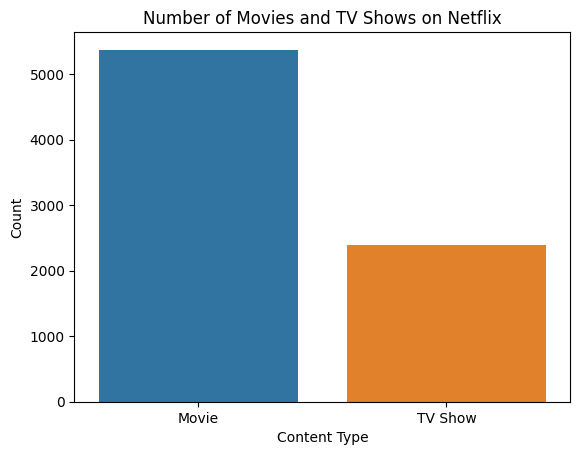

In [32]:
# Chart - 1 visualization code

# creating a bar chart showing the count of each type of content
type_counts = dt['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Number of Movies and TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Since there are only two types of content available on Netflix, namely TV shows and movies, we can perform a simple count of each type to determine which one is more abundant

##### 2. What is/are the insight(s) found from the chart?

from observation it is clear that movies are more than tv-shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis of the data can help Netflix make data-driven decisions about its content strategy and marketing efforts. By identifying the preferences of its users with regards to the type of content they consume, Netflix can allocate its resources towards producing or acquiring content that aligns with those preferences. For instance, if the data suggests that subscribers are more interested in movies than TV shows, Netflix can prioritize its efforts towards acquiring or producing more movie content, or promoting its existing movie content to improve user engagement and retention

#### Chart - 2

In [33]:
# Chart - 2 visualization code
df_rating = dt.groupby(['rating'])['show_id'].count().reset_index()
df_rating

rating  show_id
0          G       39
1      NC-17        3
2         NR       83
3         PG      247
4      PG-13      386
5          R      665
6      TV-14     1928
7       TV-G      194
8      TV-MA     2861
9      TV-PG      804
10      TV-Y      279
11     TV-Y7      270
12  TV-Y7-FV        6
13        UR        5

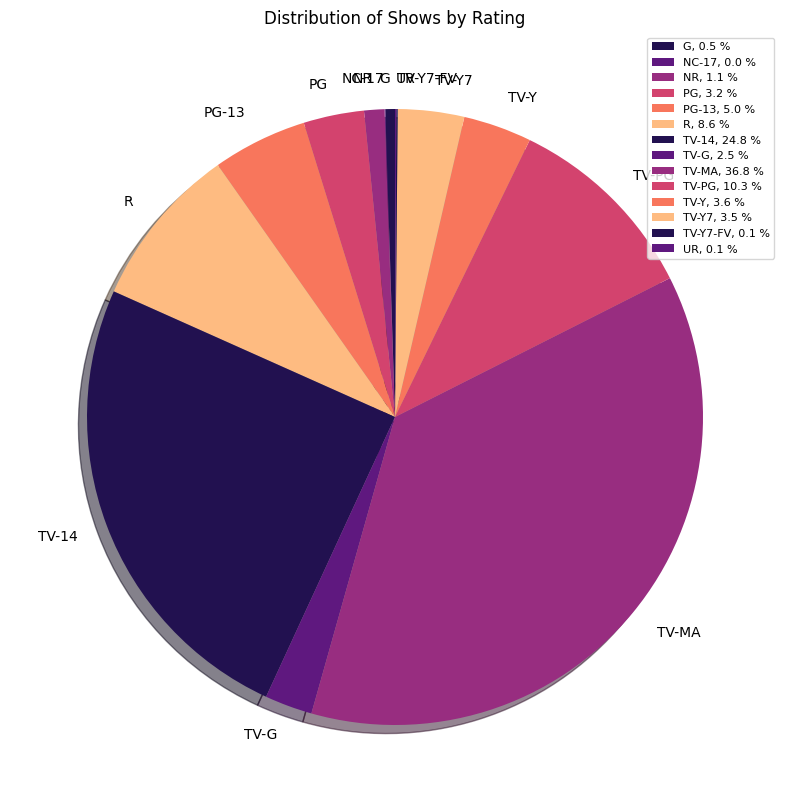

In [34]:
# Extract values for labels and sizes from DataFrame
labels = df_rating['rating'].values
sizes = df_rating['show_id'].values

#colors for the chart
colors = sns.color_palette('magma')[0:14]

# Creating the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='', shadow=True)

# Adding a title and legend
plt.title('Distribution of Shows by Rating')
plt.legend(labels=['%s, %1.1f %%' % (l, (float(s) / sum(sizes)) * 100) for l, s in zip(labels, sizes)], loc='upper right', fontsize=8)

plt.show()

##### 1. Why did you pick the specific chart?

Analyzing the types and amount of content by rating is crucial for any platform that offers content, such as Netflix.  pie chart is useful for this type of visualisation

##### 2. What is/are the insight(s) found from the chart?

TV-MA and TV-14 are the most common ratings for Netflix content, indicating a substantial interest in mature and teen-oriented programming. This insight suggests that catering to these demographics could be a valuable strategy for Netflix in attracting and retaining viewers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information regarding the ratings distribution on Netflix can aid advertisers in refining their advertising strategies to reach their intended audience more efficiently. Given that various ratings may attract distinct demographics, advertisers can leverage this data to optimize their advertising campaigns and effectively reach their target audience.

#### Chart - 3

In [35]:
# Chart - 3 visualization code
# Grouping data by release year and type,& counting the number of shows in each group
df_rls_yr = dt.groupby(['release_year', 'type'])['show_id'].count().reset_index()

print(df_rls_yr)

     release_year     type  show_id
0            1925  TV Show        1
1            1942    Movie        2
2            1943    Movie        3
3            1944    Movie        3
4            1945    Movie        3
..            ...      ...      ...
113          2019  TV Show      414
114          2020    Movie      411
115          2020  TV Show      457
116          2021    Movie       12
117          2021  TV Show       19

[118 rows x 3 columns]


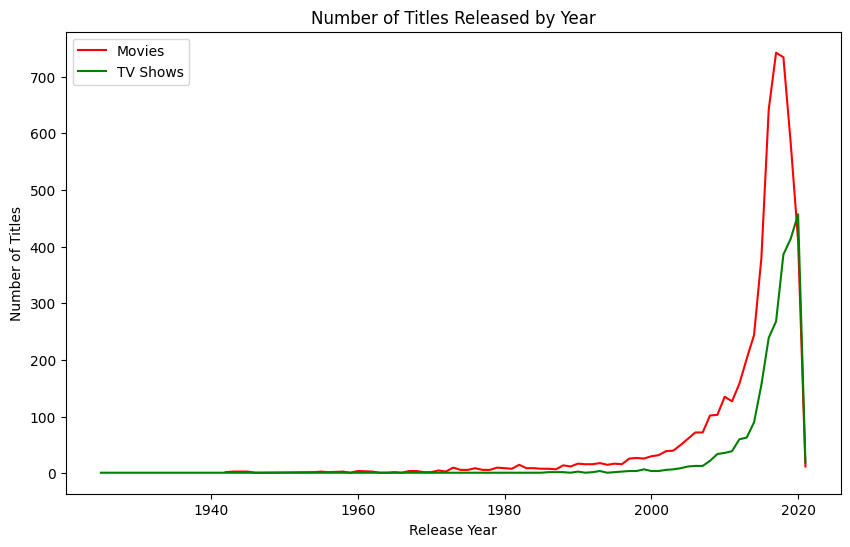

In [36]:
# sns.lineplot(data = df_rls_yr, x= 'release_year', y = 'show_id', hue = 'type')

plt.figure(figsize=(10,6))
plt.plot(df_rls_yr[df_rls_yr['type'] == 'Movie']['release_year'], df_rls_yr[df_rls_yr['type'] == 'Movie']['show_id'], label='Movies',color='red')
plt.plot(df_rls_yr[df_rls_yr['type'] == 'TV Show']['release_year'], df_rls_yr[df_rls_yr['type'] == 'TV Show']['show_id'], label='TV Shows',color='green')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released by Year')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The line plot is a powerful visual representation that allows us to examine the distribution of TV shows and movies over the years. It is a useful tool for identifying trends and patterns that emerge over time, particularly when working with data spanning multiple years.

##### 2. What is/are the insight(s) found from the chart?

The number of TV shows and movies on Netflix has grown significantly since 2010

 Reflecting the trend of consumers shifting towards on-demand streaming services. This could be attributed to Netflix's data-driven approach in identifying consumer preferences and trends.
 
  The increase in content offerings is a response to this trend and a strategy to attract more subscribers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can use data to create a content library that meets the needs and preferences of its subscribers, leading to improved customer experience and increased satisfaction.

Building a diverse and robust content library gives Netflix a competitive advantage, attracting more subscribers, increasing market share, and contributing to the overall success of the business.

#### Chart - 4

In [37]:
dt["listed_in"].value_counts().head(15)

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            204
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Comedies, International Movies, Romantic Movies     139
Action & Adventure, Dramas, International Movies    117
Dramas                                              116
International TV Shows, TV Dramas                   111
Name: listed_in, dtype: int64

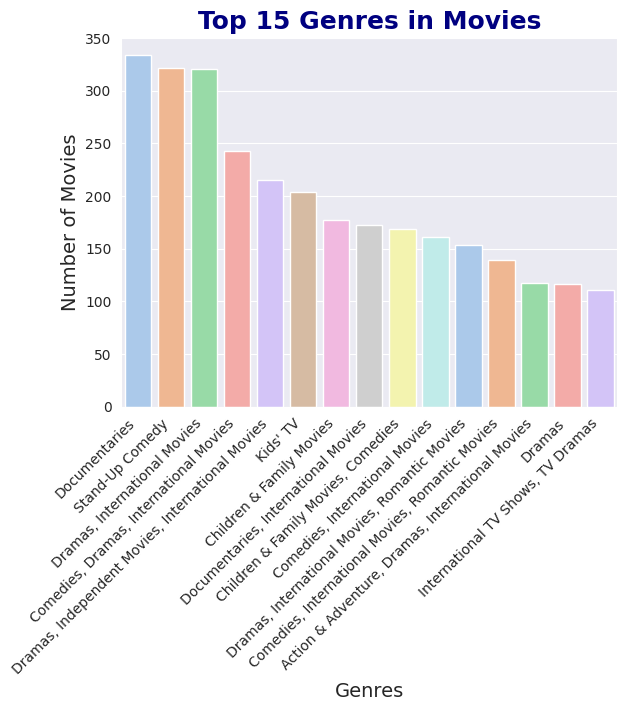

In [38]:
# Chart - 4 visualization code
#genres 
sns.set_style("darkgrid")

sns.barplot(x = dt["listed_in"].value_counts().head(15).index,
y = dt["listed_in"].value_counts().head(15).values,palette="pastel")
plt.xticks(rotation=45, ha='right')
plt.title("Top 15 Genres in Movies",size='18',fontweight="bold",color="navy")
plt.xlabel("Genres", size='14')
plt.ylabel("Number of Movies", size='14')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are a popular visualization tool for comparing categorical data. In this case, we used a bar plot to display the top 15 genres in our dataset

##### 2. What is/are the insight(s) found from the chart?

Documentaries, stand-up comedy, drama, international movies, and comedies are among the most popular genres on Netflix. This is likely due to the fact that people often seek out content that is relatable to their own lives and feels authentic

By identifying and investing in genres that resonate with their audience, streaming platforms like Netflix can continue to attract and retain subscribers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can use the insights gained from the popularity of different genres among its subscribers to create a more diverse and appealing content library, driving subscriber growth and engagement. This can help establish a competitive advantage for Netflix in the streaming industry.

#### Chart - 5

In [39]:
# Chart - 5 visualization code
# df_durn = dt['duration'].value_counts().reset_index()

df_durn = dt.groupby(['duration'])['show_id'].count().sort_values(ascending= False).reset_index()
df_durn.columns = ['duration', 'count']
df_durn

duration  count
0     1 Season   1606
1    2 Seasons    378
2    3 Seasons    183
3       90 min    136
4       93 min    131
..         ...    ...
211    196 min      1
212    194 min      1
213    193 min      1
214     43 min      1
215    204 min      1

[216 rows x 2 columns]

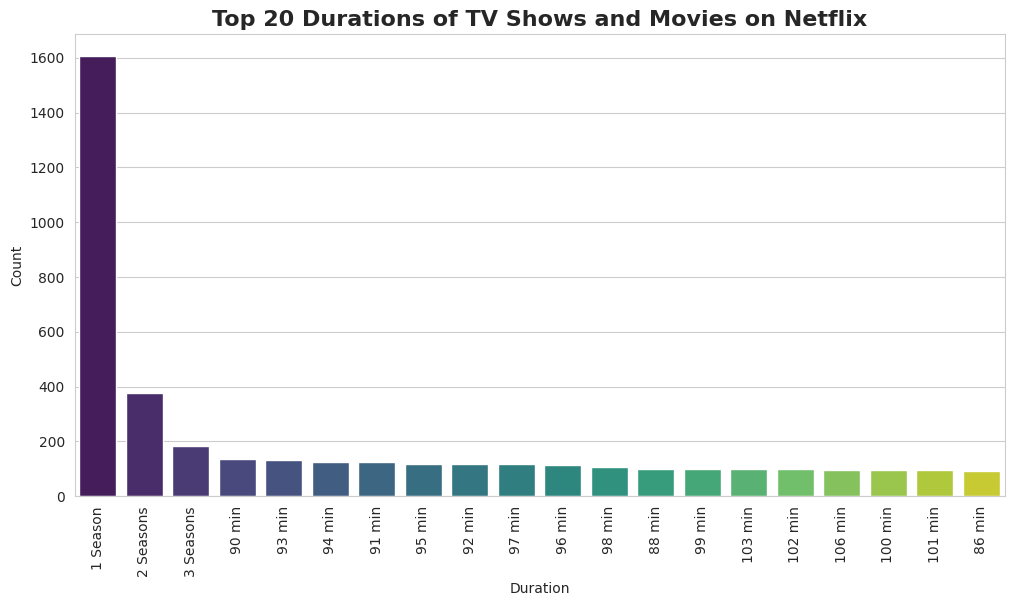

In [40]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=df_durn.head(20), x='duration', y='count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 20 Durations of TV Shows and Movies on Netflix', size=16, fontweight='bold')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

For plotting duration vs count for diffrent seasons barplot is very useful and appealing

##### 2. What is/are the insight(s) found from the chart?

"Season 1" is the most common duration for TV shows on Netflix, indicating that the platform prefers to organize its original programming into seasons.


This preference for "Season 1" could also imply that viewers are more likely to watch a new show when it is first released, rather than waiting for additional seasons. This might be because viewers are more interested in a show when it is first available, or because of Netflix's marketing efforts.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the most frequent duration for TV shows on Netflix could provide valuable insights for the streaming service to make informed decisions about its content acquisition and production strategies

By tailoring its programming structure and release schedule to align with viewers' preferences, Netflix can increase engagement and loyalty among its audience

#### Chart - 6

In [41]:
# Chart - 6 visualization code
# Grouping the data by country and type, and counting the number of shows in each group
# df_country = dt.groupby(['country', 'type']).size().sort_values(ascending=False).reset_index(name='count')

shows_by_country = dt.groupby(['country', 'type'])['show_id'].count().sort_values(ascending = False).reset_index()
shows_by_country

country     type  show_id
0                                        United States    Movie     2076
1                                        United States  TV Show      975
2                                                India    Movie      852
3                                       United Kingdom  TV Show      203
4                                       United Kingdom    Movie      193
..                                                 ...      ...      ...
768                           Indonesia, United States    Movie        1
769                                       Iran, France    Movie        1
770                                    Ireland, Canada    Movie        1
771  Ireland, Canada, Luxembourg, United States, Un...    Movie        1
772                                           Zimbabwe    Movie        1

[773 rows x 3 columns]

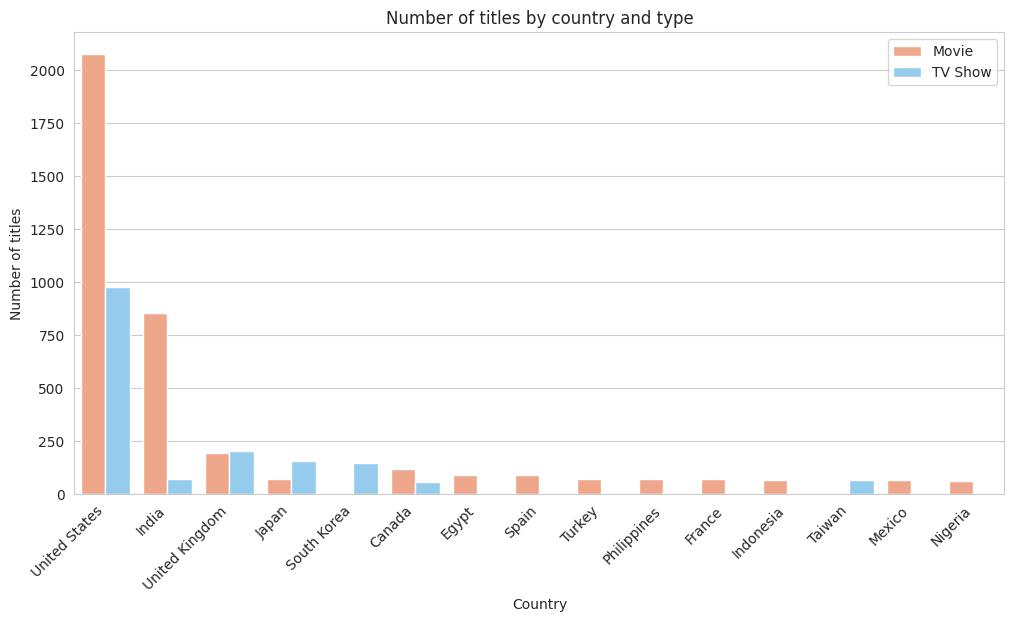

In [42]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
colors = ["#ffa07a", "#87cefa", "#ff69b4", "#6b8e23", "#9400d3", "#ffd700"]

sns.barplot(data=shows_by_country[:20], x='country', y='show_id', hue='type',palette=colors)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Number of titles')
plt.title('Number of titles by country and type')
plt.legend(loc='upper right')

plt.show()

##### 1. Why did you pick the specific chart?

In this analysis, we are utilizing a bar plot to perform a bivariate analysis and compare the production of movies and TV shows among different countries. Bivariate analysis through bar plots is a technique employed to examine the correlation between two categorical variables.

##### 2. What is/are the insight(s) found from the chart?

USA and India emerge as the top content producing countries on Netflix. This finding suggests that these countries are able to create content that resonates with audiences worldwide.

The high volume of content produced by these countries could indicate that they have a competitive advantage in the entertainment industry, making them attractive markets for investment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The prevalence of the USA and India as the top producers of movies and TV shows has significant implications for the industry and can inform strategic business decisions.

#### Chart - 7

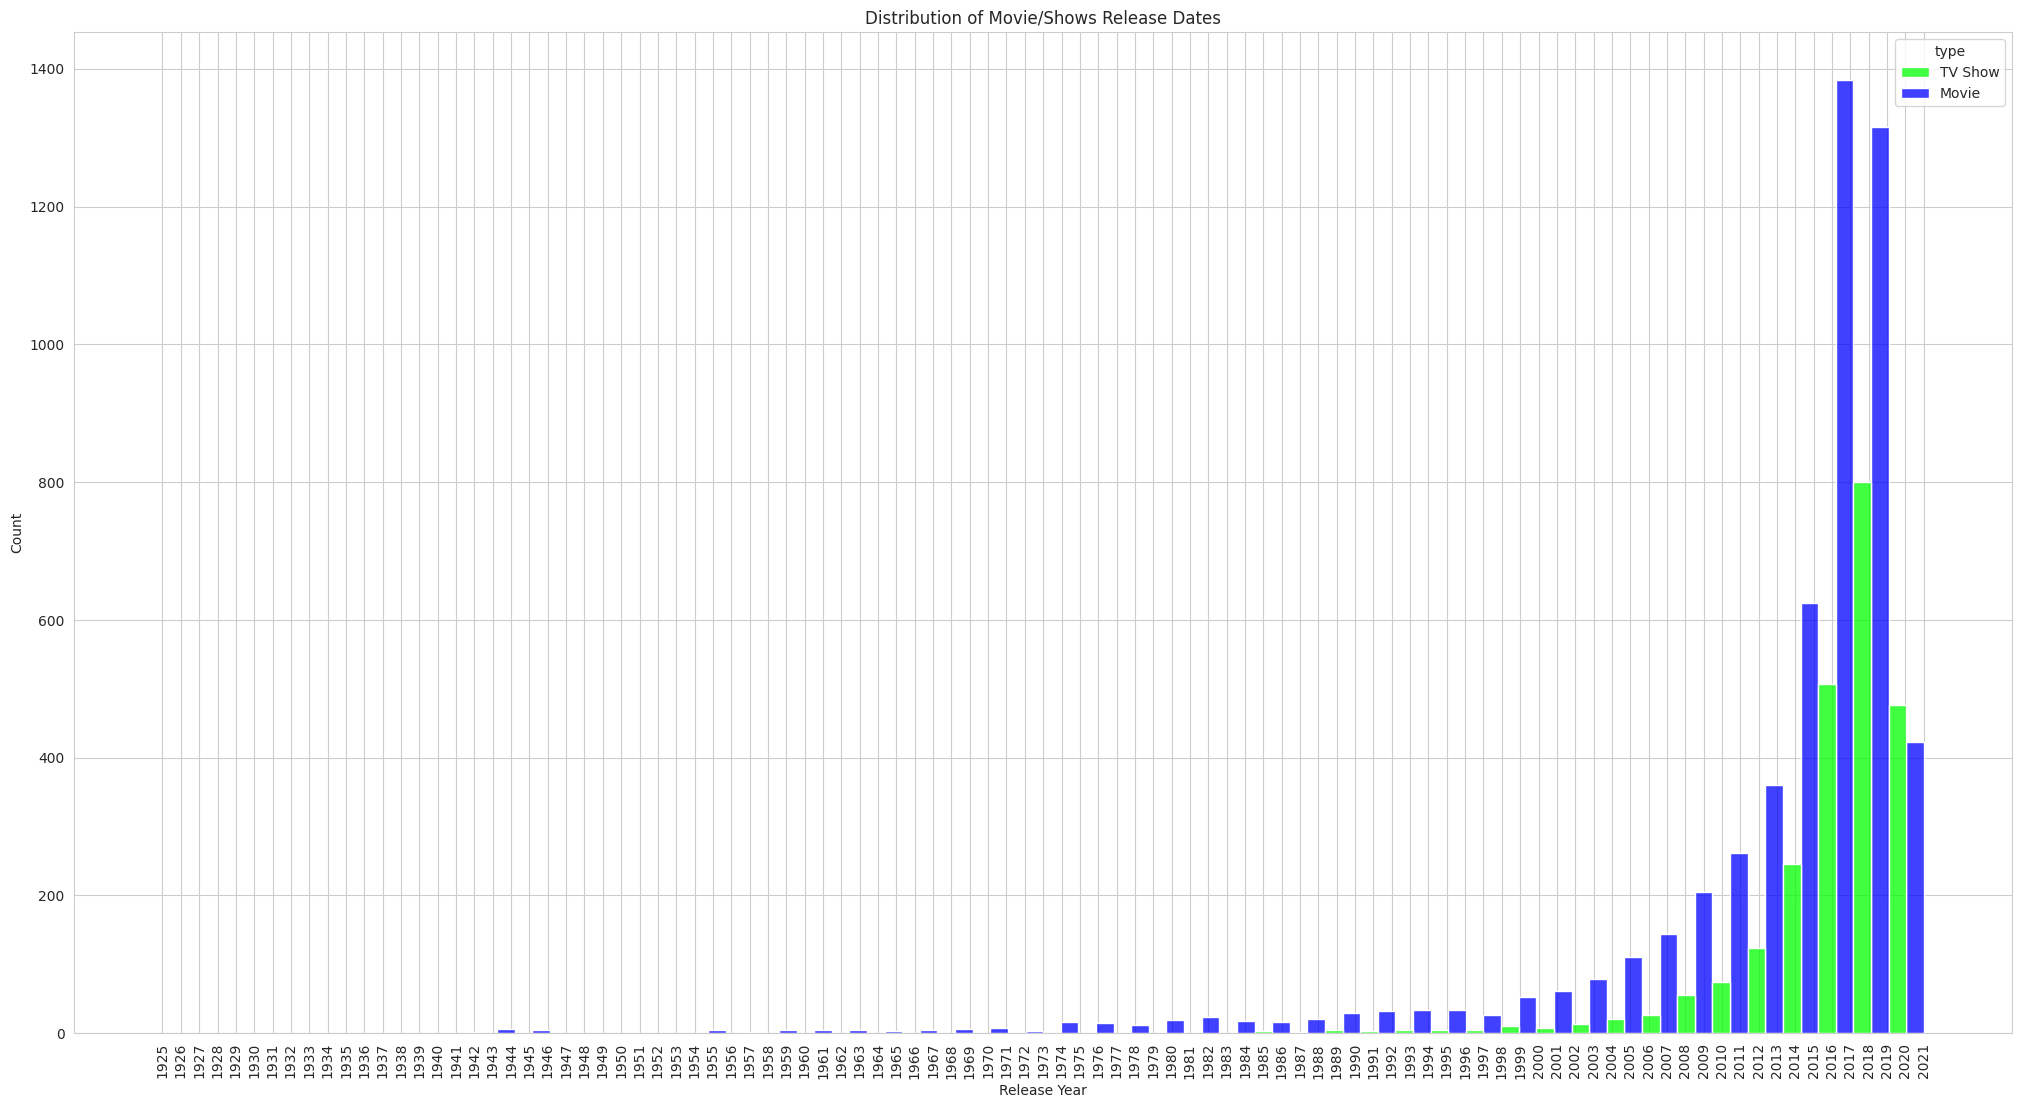

In [43]:
# Chart - 7 visualization code
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(25,13))

sns.histplot(data=dt, x="release_year", hue="type", kde=False, ax=ax, multiple="dodge", bins=50, palette=["#00ff00", "#0000ff"],)

ax.set_xticks(ticks=np.arange(dt.release_year.min(), dt.release_year.max()+1, 1))
ax.tick_params(axis='x', rotation=90)
ax.set_title("Distribution of Movie/Shows Release Dates")
ax.set_xlabel("Release Year")
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen as a visualization tool to display the distribution of movie and TV show releases over time, highlighting periods of increased or decreased production.

##### 2. What is/are the insight(s) found from the chart?

The production of content on the platform has seen a significant increase after 2010.

The year 2017 saw the highest number of movie releases while the year 2018 saw the highest number of TV show releases.

The period between 2017 and 2019 witnessed the highest number of content releases or additions to the platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These observations provide valuable insights that can aid in comprehending Netflix's expansion path and making informed decisions regarding content strategy and marketing initiatives.

#### Chart - 8

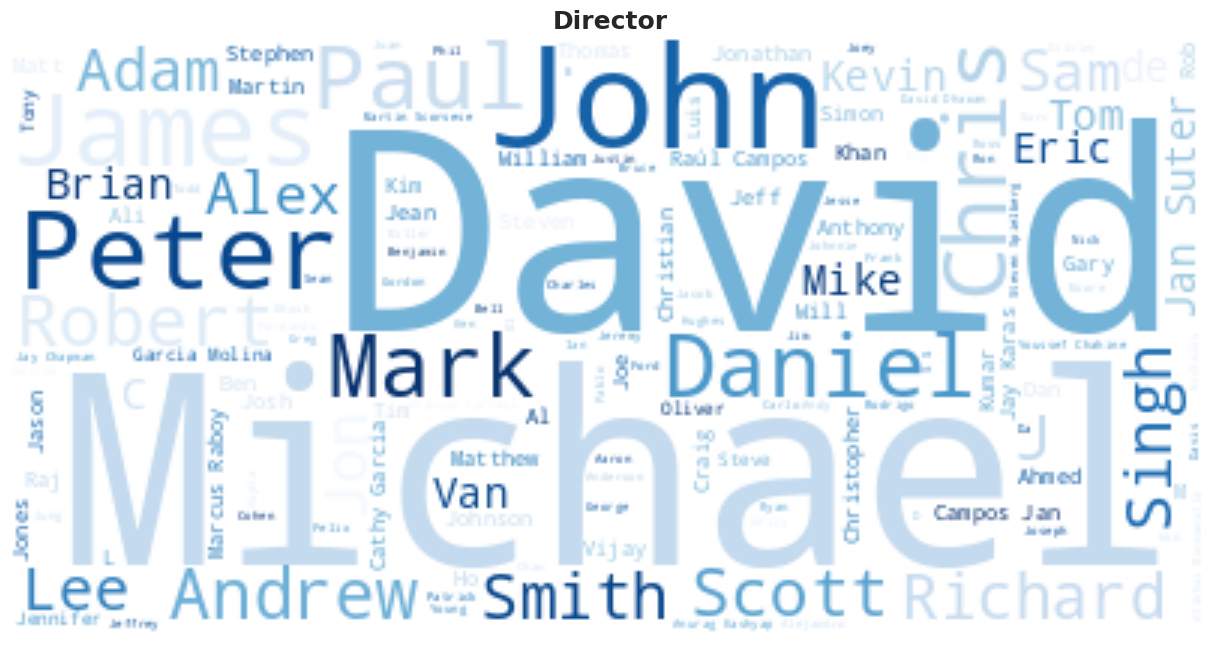

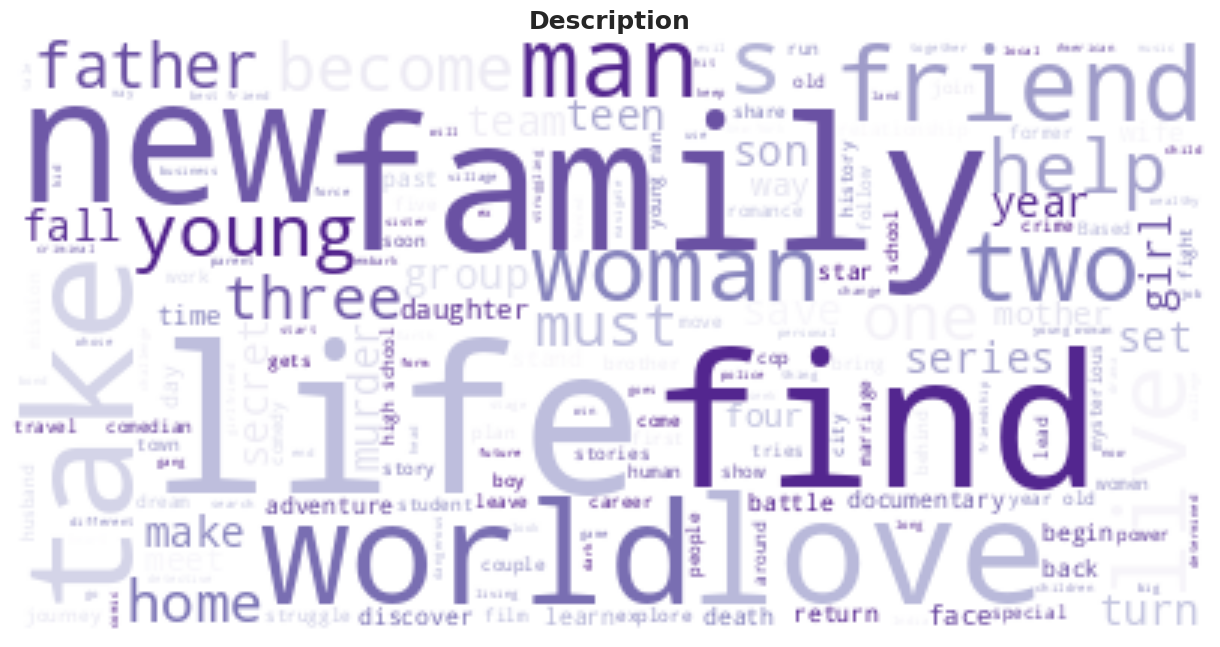

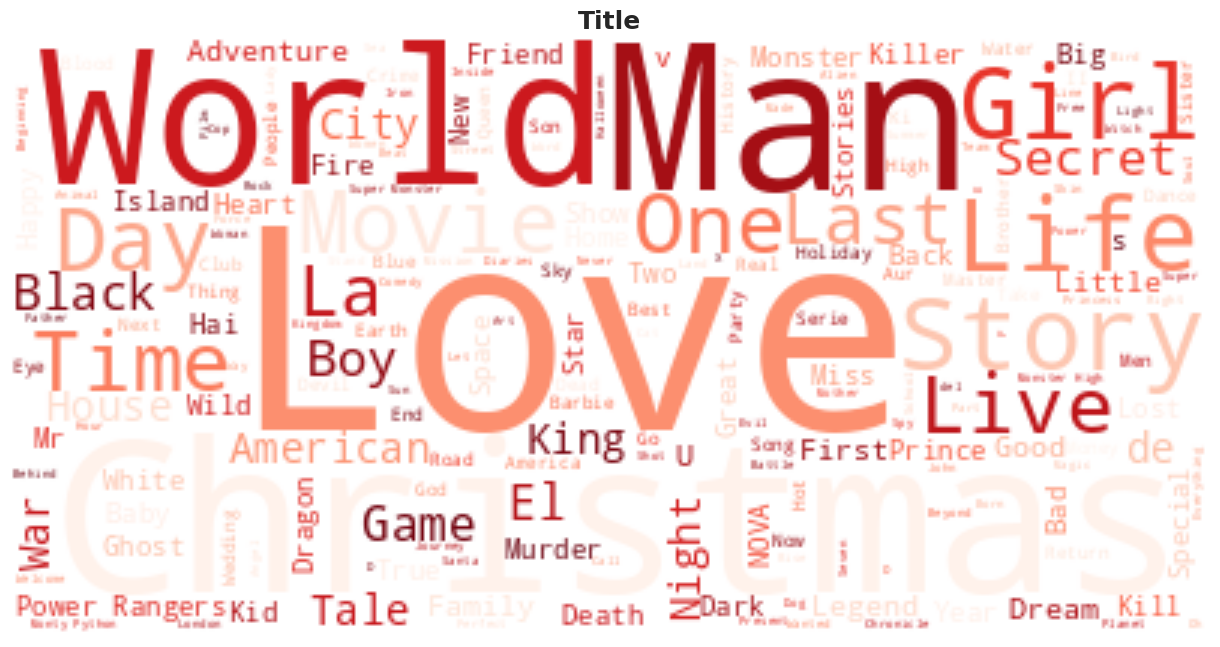

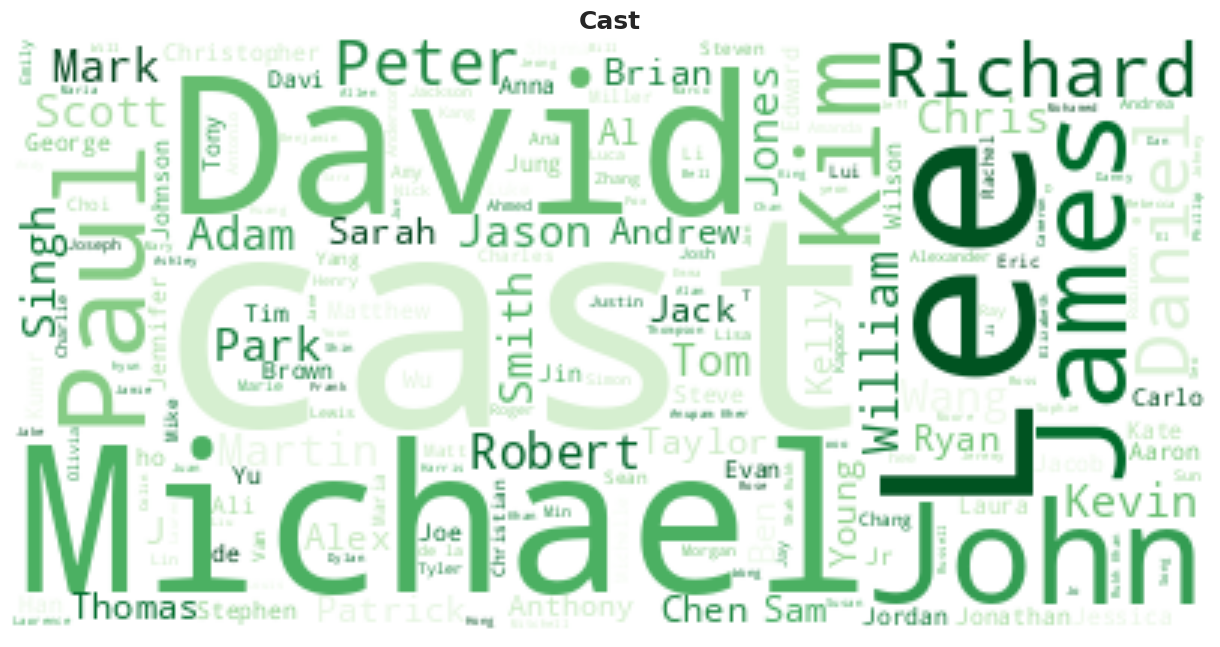

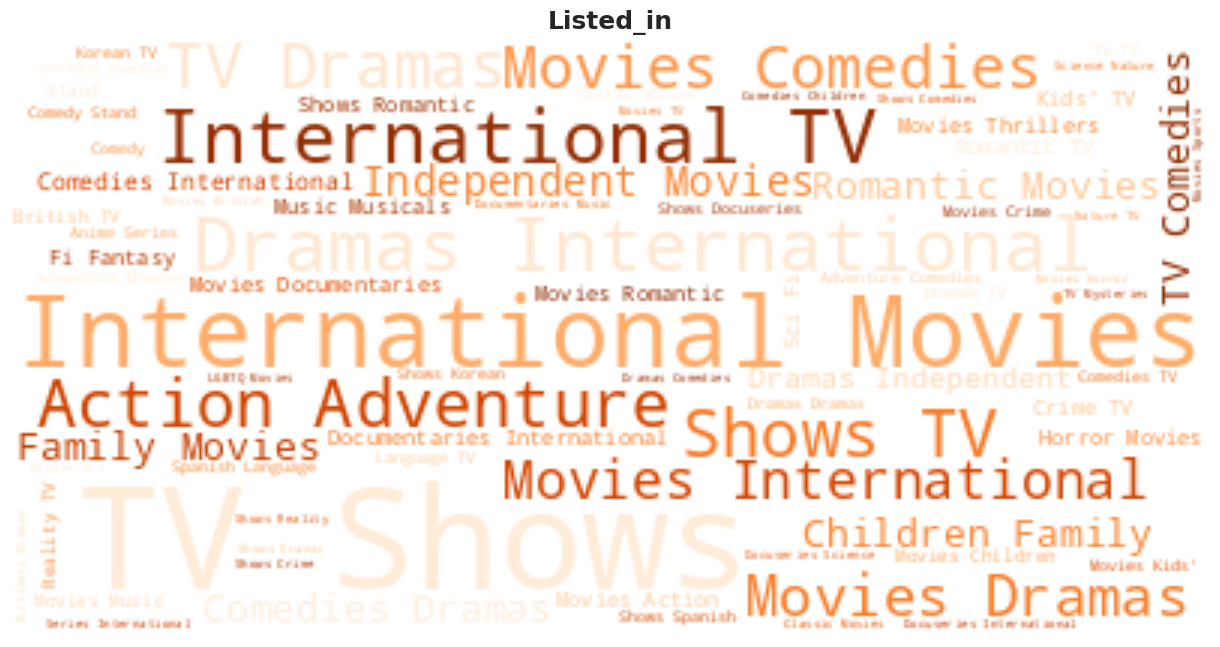

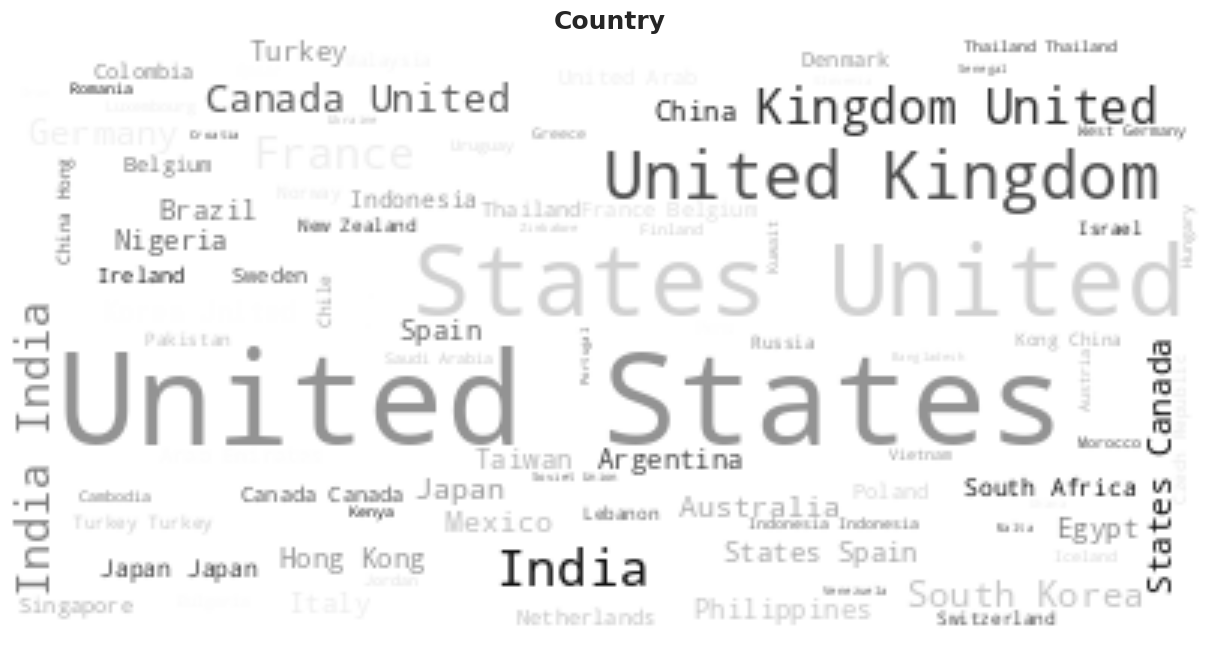

In [44]:
# Chart - 8 visualization code
#features to be used for word cloud visualization
selected_features = ['director', 'description', 'title', 'cast', 'listed_in', 'country']

# Define colors for wordclouds
colors = ['Blues', 'Purples', 'Reds', 'Greens', 'Oranges', 'Greys']

# Generate wordclouds for each feature
for i, feature in enumerate(selected_features):
    text = ' '.join(dt[feature].astype(str).tolist())

    #stopwords set is used to remove these common words from the text before generating the word cloud.
    stopwords = set(STOPWORDS)
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap=colors[i]).generate(text)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(feature.capitalize(), fontsize=18, fontweight='bold')
    plt.tight_layout(pad=0)
    plt.show()


##### 1. Why did you pick the specific chart?

A word cloud plot was utilized to display the most commonly used words or phrases within a given text or dataset. This type of visualization allows for a quick and easy understanding of the most significant words, themes, and patterns present in the data, making it a useful tool for identifying important insights and trends.

##### 2. What is/are the insight(s) found from the chart?

The top five most frequent director names in the dataset are David, Michael, Johns, Daniel, and Paul.

The frequently occurring words in the description column include find, love, life, live, man, woman, battle, help, and friend, indicating that movies often revolve around themes of personal growth, relationships, and overcoming obstacles.

The most frequent actor names in the cast column include Michael, James, David, John, and Paul.

The most common genres listed in the dataset include international movies, dramas, action, adventure, and international movies, while the most frequent country names include US, India, UK, Japan, Germany, and Canada.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix could utilize the information gathered from the word cloud to customize content recommendations for users based on their geographic location, preferred genres, and favorite actors/directors.

The identification of popular keywords in movie descriptions could be used to optimize search results and create more enticing movie synopses for users.

By utilizing these insights, Netflix can enhance the user experience, increase customer satisfaction, and generate more revenue.

#### Chart - 9

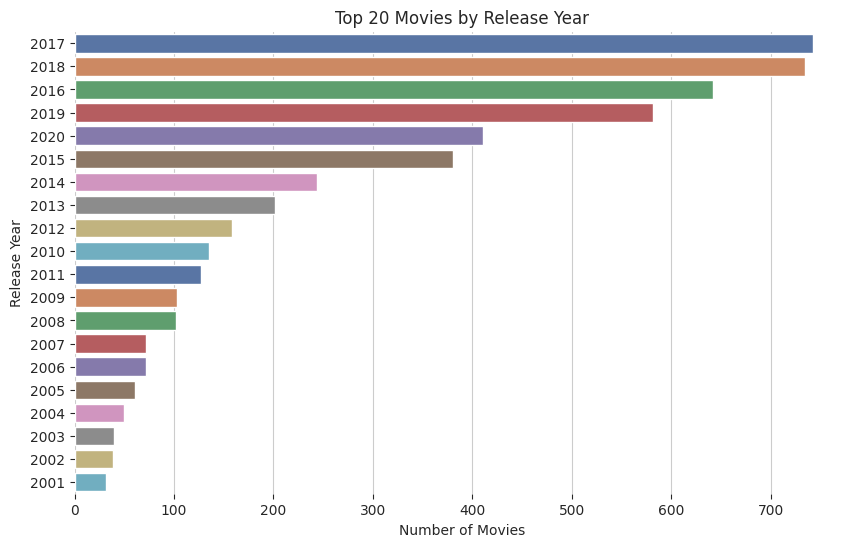

In [45]:
# Chart - 9 visualization code
#separate dataframes for TV shows and movies
tv_shows = dt[dt['type'] == 'TV Show']
movies = dt[dt['type'] == 'Movie']

#figure size and style
plt.figure(figsize=(10,6))
sns.set_style('ticks')

# creating the countplot with custom color palette
sns.countplot(y=movies['release_year'], data=movies,                                            #.iloc[:20].index
              palette=sns.color_palette('deep', 20),order=movies['release_year'].value_counts().index[0:20])

#axis labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.title('Top 20 Movies by Release Year')

# adjusting the grid and removing spines
sns.despine(left=True, bottom=True)
plt.grid(axis='x')

plt.show()

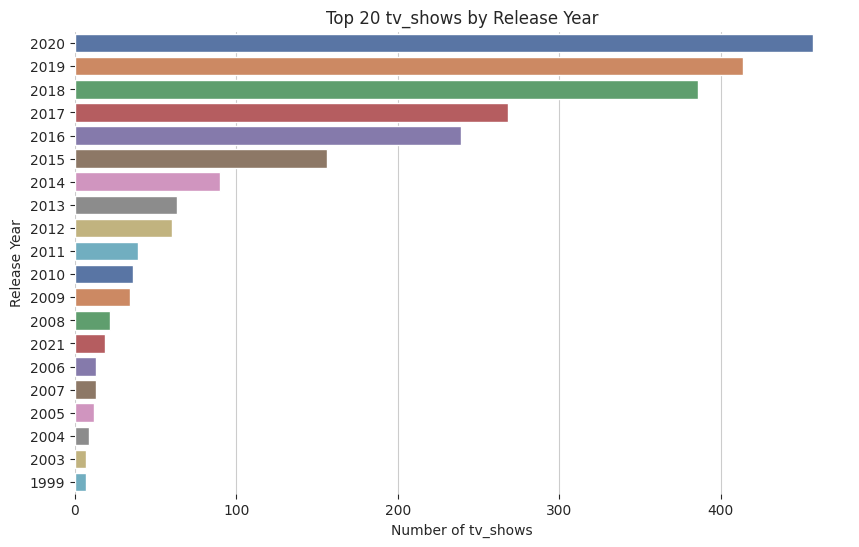

In [46]:
plt.figure(figsize=(10,6))
sns.set_style('ticks')

# creating the countplot with custom color palette
sns.countplot(y=tv_shows['release_year'], data=tv_shows,                                            
              palette=sns.color_palette('deep', 20),order=tv_shows['release_year'].value_counts().iloc[:20].index)

#axis labels and title
plt.xlabel('Number of tv_shows')
plt.ylabel('Release Year')
plt.title('Top 20 tv_shows by Release Year')

# adjusting the grid and removing spines
sns.despine(left=True, bottom=True)
plt.grid(axis='x')

plt.show()

##### 1. Why did you pick the specific chart?

visually display the distinction in the number of TV shows and movies by presenting them in separate plots. This allowed for a clear comparison between the counts of TV shows and movies 

##### 2. What is/are the insight(s) found from the chart?

Our data analysis revealed that 2017 had the highest number of added movies on Netflix, while 2020 had the greatest number of released TV shows. The exceptional growth in TV shows in 2020 can be attributed to the COVID-19 pandemic, which led to a surge in streaming activities as people stayed at home.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can certainly help create a positive business impact for Netflix. By understanding the trends in their content offerings, Netflix can make informed decisions regarding their future investments in movies and TV shows

As for negative growth, the insights alone do not necessarily indicate any negative impact on Netflix's business. However, if the company does not respond to the trends by adjusting their content offerings and marketing strategies accordingly, they may miss out on potential growth opportunities.

#### Chart - 10

In [47]:
# Chart - 10 visualization code
# dt['month'] = pd.DatetimeIndex(dt['date_added']).month

# Convert date_added column to datetime format
dt['date_added'] = pd.to_datetime(dt['date_added'])

# Extract month from date_added column and assign to month column
dt['month'] = dt['date_added'].dt.month
dt.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  
0  In a future where the elite inhabit an island ...      8  
1  After a devastating earthquake hits Mexico Cit...     12  
2  When an army recruit is found dead, his fellow...     12  
3  In a postapocalyptic world, rag-doll robots hi...     11  
4  A brilliant group of students become card-coun...      1

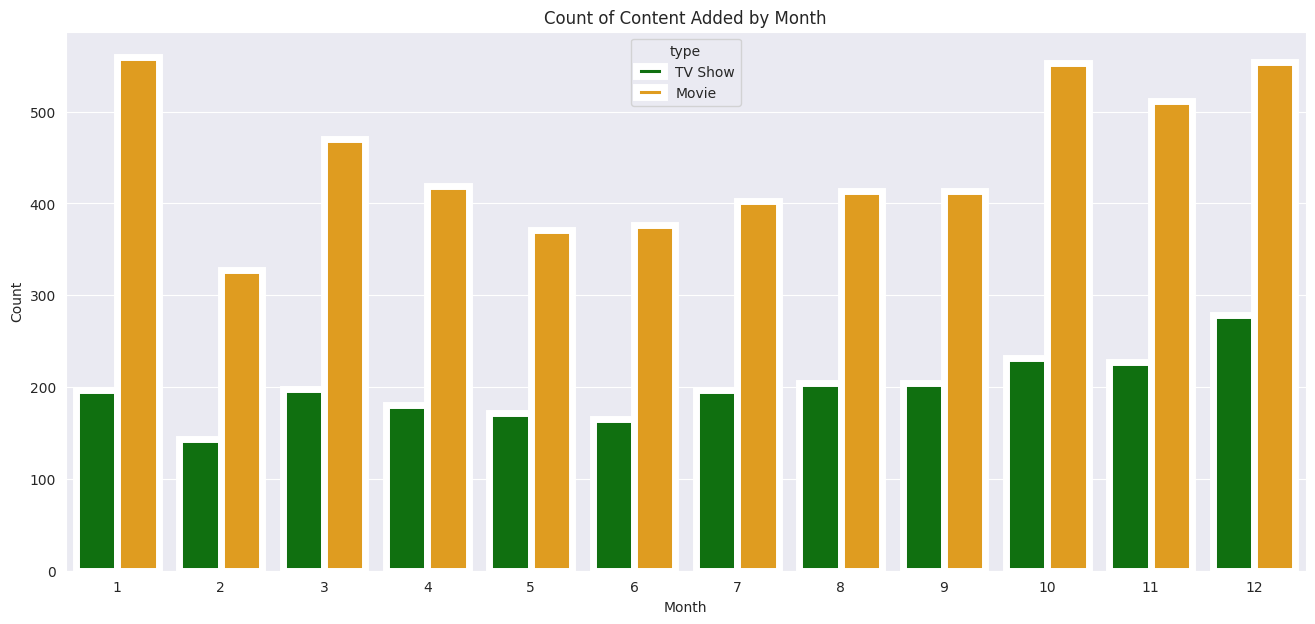

In [48]:
# Set the style and color palette
sns.set_style('darkgrid')
colors = ['green', 'orange'] 
sns.set_palette(sns.color_palette(colors))

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(16, 7))

# Plot the countplot
sns.countplot(x='month', data=dt,hue='type',lw=5, ax=ax)

# Customize the plot
ax.set_title('Count of Content Added by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

plt.show()

##### 1. Why did you pick the specific chart?

We utilized the Countplot chart to visualize the distribution of TV shows and movies added over the months. This chart enables us to observe the count of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

Max contents released in december followed by january

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By identifying the months with the highest number of releases, Netflix can create more targeted marketing campaigns and promotions during those specific months. 

#### Chart - 11

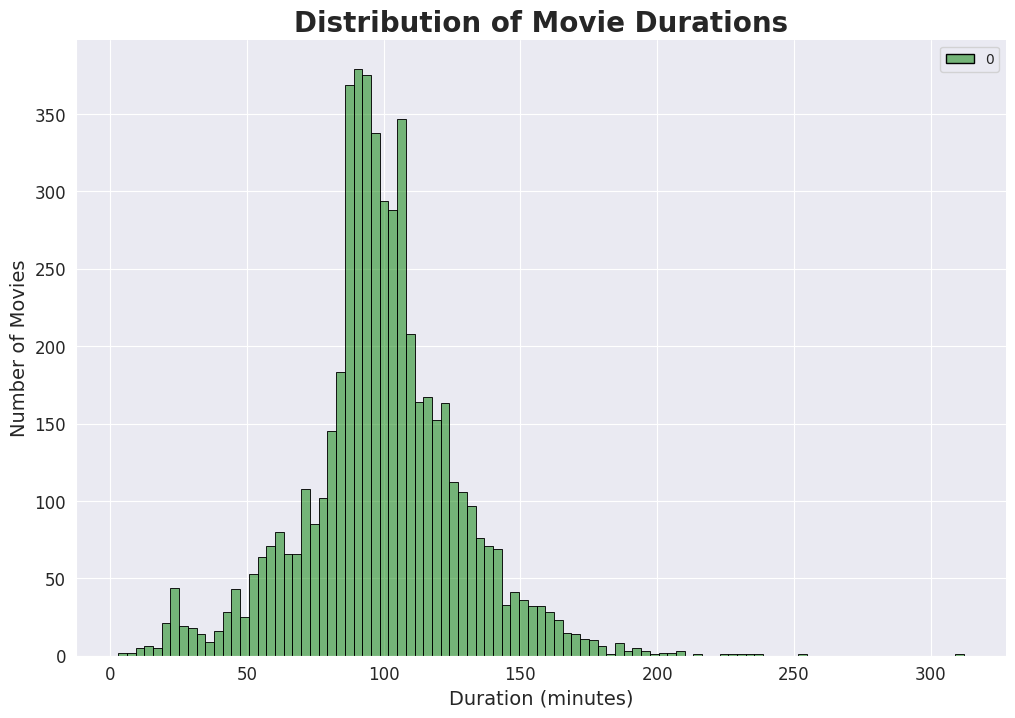

In [49]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 8))

sns.histplot(movies['duration'].str.extract('(\d+)').astype(int),
             kde=False, color='purple', edgecolor='black')

plt.title('Distribution of Movie Durations', fontsize=20, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.set_style('ticks')
sns.despine()
plt.show()

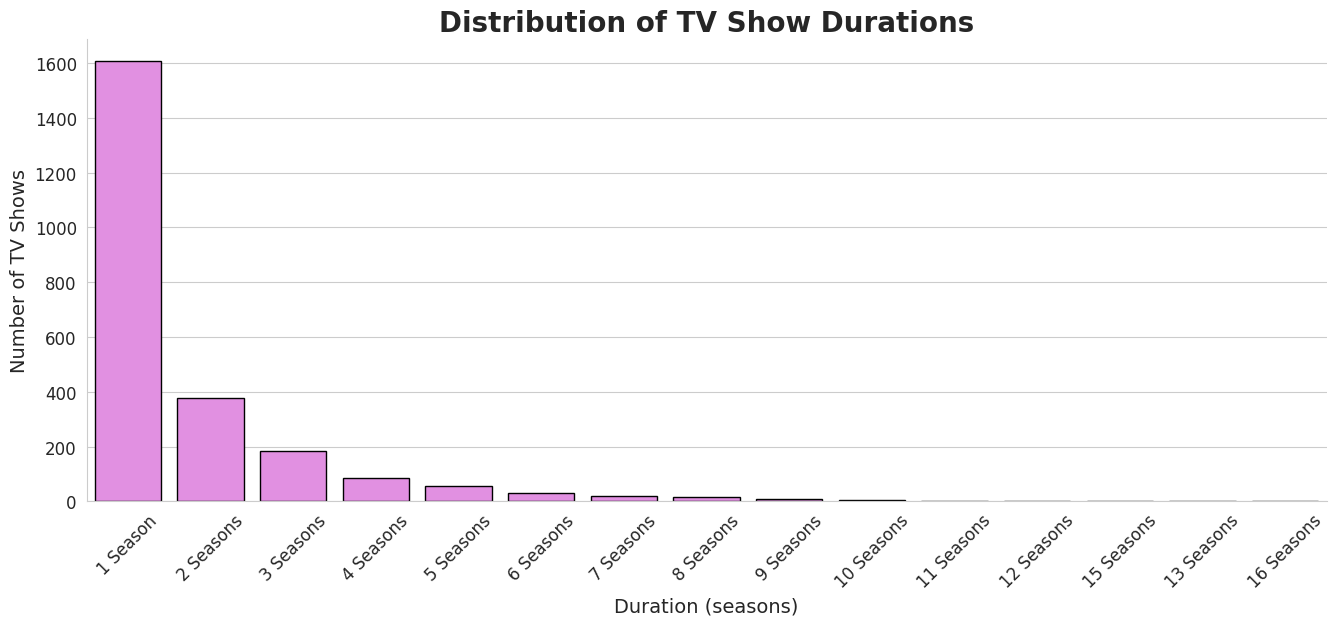

In [50]:
#distribution of TV SHOWS

plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
sns.countplot(x='duration', data=tv_shows,
              order=tv_shows['duration'].value_counts().index,
              color='violet', edgecolor='black')
plt.title('Distribution of TV Show Durations', fontsize=20, fontweight='bold')
plt.xlabel('Duration (seasons)', fontsize=14)
plt.ylabel('Number of TV Shows', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

##### 1. Why did you pick the specific chart?

For durati0on features of movie and tv-shows chart is really useful

##### 2. What is/are the insight(s) found from the chart?

The distribution of the variable 'duration' for movies appears to be similar to a normal distribution, with no significant skewness in the data. However, the distribution of 'duration' for TV shows is highly skewed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

it might useful in making positive bussiness impact,understanding the typical duration of a movie or TV show could help production companies plan their projects more efficiently and optimize their resources.

However, there is a possibility that some of the insights could lead to negative growth. For instance, if the analysis reveals that the majority of viewers prefer shorter movies or TV shows, then producing longer content could result in negative growth as it may not appeal to the majority of the target audience.

#### Chart - 12

In [51]:
# Chart - 12 visualization code
dt['date_added'] = pd.to_datetime(dt['date_added'])  # Convert 'date_added' column to datetime format
dt['year_added'] = dt['date_added'].dt.year  # Extract the year from the 'date_added' column and store in 'year_added'
dt

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                        João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                                               Nasty C   
7785                                            Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No cast   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  month  year_added  
0     In a future where the elite inhabit an island ...      8        2020  
1     After a devastating earthquake hits Mexico Cit...     12        2016  
2     When an

In [52]:
movies = dt[dt['type'] == 'Movie']  # Filter the rows where 'type' is 'Movie' and assign to a new dataframe 'movies'
tv_shows = dt[dt['type'] == 'TV Show']  # Filter the rows where 'type' is 'TV Show' and assign to a new dataframe 'tv_shows'

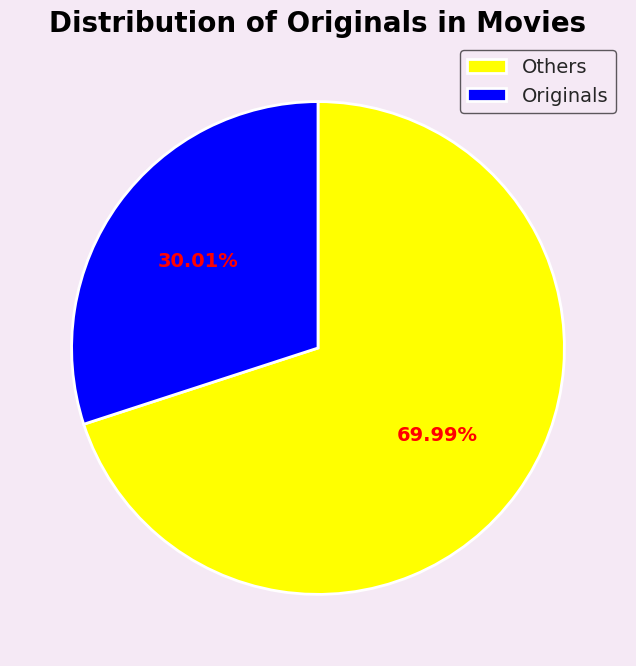

In [53]:
# Create a new column 'originals' based on whether release year matches year added
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Originals', 'Others')

# Plot a pie chart with custom styles and colors
fig, ax = plt.subplots(figsize=(8, 8), facecolor='#F5E9F5')
ax.set_title('Distribution of Originals in Movies', fontsize=20, fontweight='bold', color='black')

ax.pie(movies['originals'].value_counts(), autopct='%.2f%%', startangle=90, counterclock=False,
       textprops={'fontsize': 14, 'color': 'red', 'fontweight': 'bold'},
       colors=['yellow', 'blue'], wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

ax.legend(labels=['Others', 'Originals'], loc='upper right', fontsize=14, facecolor='#F5E9F5', edgecolor='#363336')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was created to visualize the distribution of Netflix's original content versus other content on the platform, with various options such as specifying the start angle, percentage format, colors, and wedge properties.

##### 2. What is/are the insight(s) found from the chart?

The analysis revealed that Netflix has more than 30% of its content as original, indicating a significant investment in creating and promoting their unique content. This strategy could be viewed as a way to distinguish themselves from other streaming services and maintain a competitive edge in the market.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By gaining insights into the popularity of original versus non-original content on their platform, Netflix can make informed decisions on how to allocate their marketing budget effectively. This, in turn, can improve the platform's overall performance and help retain its subscriber base.

Promoting their original content can help Netflix build brand recognition and reputation as a provider of high-quality and innovative content, further distinguishing themselves from competitors.

Understanding the popularity of original content on the platform can aid Netflix in making informed decisions about content acquisition and retention, marketing, and brand management. These insights can ultimately lead to positive business impacts for the company.

#### Chart - 13

In [54]:
# Chart - 13 visualization code
#dictionary to map ratings to target age groups
rating_groups = {'TV-PG': 'Older Kids', 'TV-MA': 'Adults', 'TV-Y7-FV': 'Older Kids', 
                 'TV-Y7': 'Older Kids', 'TV-14': 'Teens', 'R': 'Adults', 'TV-Y': 'Kids', 
                 'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids', 'PG': 'Older Kids', 
                 'G': 'Kids', 'UR': 'Adults', 'NC-17': 'Adults'}

#Adding a new column 'target_ages' to the dataframe 'data'
dt['target_ages'] = dt['rating'].replace(rating_groups)

In [55]:
dt.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                      
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   

  target_ages  
0      Adults  
1      Adults

In [56]:
# Preparing data for heatmap
dt['count'] = 1
data = dt.groupby('country')['count'].sum().sort_values(ascending=False)[:10].index

df_heatmap = dt.loc[dt['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['target_ages'], df_heatmap['country'], normalize='index')
df_heatmap

country        Canada     Egypt    France     India     Japan    Mexico  \
target_ages                                                               
Adults       0.032631  0.011565  0.032218  0.097480  0.033870  0.031805   
Kids         0.084211  0.000000  0.028947  0.039474  0.005263  0.005263   
Older Kids   0.041152  0.004115  0.007202  0.152263  0.062757  0.007202   
Teens        0.015941  0.042305  0.011649  0.321275  0.048437  0.008584   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.035523  0.046262        0.083850       0.594796  
Kids            0.013158  0.007895        0.097368       0.718421  
Older Kids      0.022634  0.006173        0.083333       0.613169  
Teens           0.042918  0.007971        0.045984       0.454936

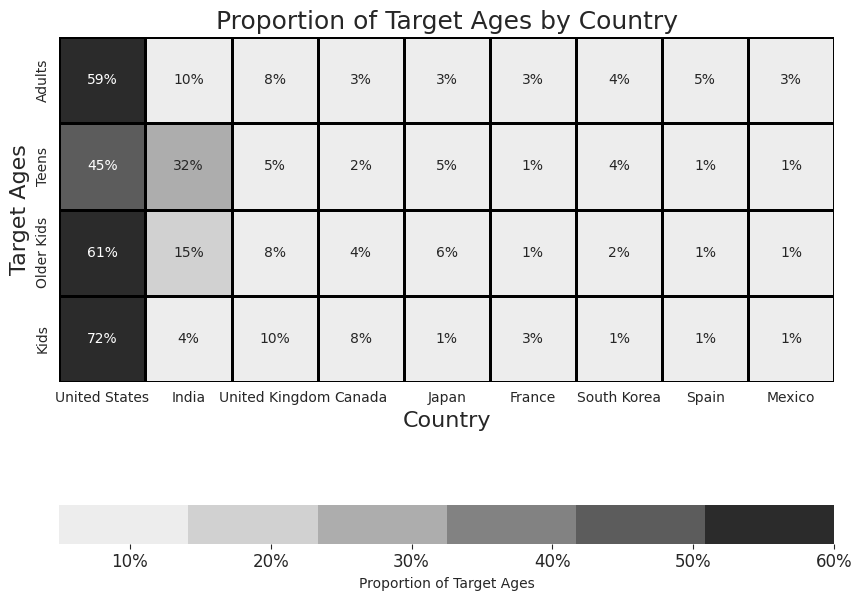

In [57]:
#Setting country order and age order
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

#heatmap figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

#heatmap style and color palette
sns.set_style('darkgrid')
colors = sns.color_palette('Greys')


# Plotting heatmap using the filtered and aggregated data
sns.heatmap(df_heatmap.loc[age_order, country_order], cmap=colors, square=True, linewidths=1, linecolor='black',
            cbar=True, cbar_kws={'orientation': 'horizontal', 'pad': 0.2, 'label': 'Proportion of Target Ages'},
            annot=True, fmt='1.0%', vmin=0.05, vmax=0.6, ax=ax)


# axis labels and titles
ax.set_xlabel('Country', fontsize=16)
ax.set_ylabel('Target Ages', fontsize=16)
ax.set_title('Proportion of Target Ages by Country', fontsize=18)

#colorbar ticks and labels
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_xticklabels(['5%', '10%', '20%', '30%', '40%', '50%', '60%'])

plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are used to visualize relationships between two variables. In this case, we want to show the distribution of the target age groups across the top 10 countries with the most content on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The analysis shows that Netflix target age preferences in the US and UK are highly similar, indicating a shared interest in content between the two countries. Similarly, the alignment of Netflix target ages in the US and Canada suggests a similarity in content preferences between these two countries as well.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The heatmap provides valuable insights into how the age group of viewers in different countries impacts their content preferences, which can guide Netflix in their content acquisition and localization strategies.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (HO): Movies rated for kids and older kids have a minimum duration of two hours.

Alternative hypothesis (H1): Movies rated for kids and older kids do not have a minimum duration of two hours.

#### 2. Perform an appropriate statistical test.

In [58]:
movies.head(2)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating duration                            listed_in  \
1          2016  TV-MA   93 min         Dramas, International Movies   
2          2011      R   78 min  Horror Movies, International Movies   

                                         description  month  year_added  \
1  After a devastating earthquake hits Mexico Cit...     12        2016   
2  When an army recruit is found dead, his fellow...     12        2018   

   originals  
1  Originals  
2     Others

In [59]:
dt_hypothesis=dt.copy()
#head of df_hypothesis
dt_hypothesis.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   
2  When an army recruit is found dead, his fellow...     12        2018   
3  In a postapocalyptic world, rag-doll robots hi...     11        2017   
4  A brilliant group of students become card-coun...      1        2020   

  target_ages  count  
0      Adults      1  
1      Adults      1  
2      Adults      1  
3       Teens      1  
4       Teens      1

In [60]:
#movie from Type_of_show column
dt_hypothesis = dt_hypothesis[dt_hypothesis["type"] == "Movie"]

In [61]:
#function to map each rating to a target age category
def map_rating_to_age(rating):
    if rating in ['TV-Y', 'G', 'TV-G']:
        return 'Kids'
    elif rating in ['TV-Y7-FV','TV-PG', 'PG', 'TV-Y7']:
        return 'Older Kids'
    elif rating in [ 'PG-13', 'TV-14']:
        return 'Teens'
    elif rating in ['TV-MA', 'R', 'NR', 'NC-17', 'UR']:
        return 'Adults'

# Apply mapping function to create a new column 'target_ages'
dt_hypothesis['target_ages'] = dt_hypothesis['rating'].apply(map_rating_to_age)

# Display the unique target age categories
dt_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [62]:
#there is a category target_ages (4 classes).
dt_hypothesis['target_ages'] = pd.Categorical(dt_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

#from duration feature extractin string part and after extracting Changing the object type to numeric
dt_hypothesis['duration']= dt_hypothesis['duration'].str.extract('(\d+)')
dt_hypothesis['duration'] = pd.to_numeric(dt_hypothesis['duration'])

dt_hypothesis.head(2)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating  duration                            listed_in  \
1          2016  TV-MA        93         Dramas, International Movies   
2          2011      R        78  Horror Movies, International Movies   

                                         description  month  year_added  \
1  After a devastating earthquake hits Mexico Cit...     12        2016   
2  When an army recruit is found dead, his fellow...     12        2018   

  target_ages  count  
1      Adults      1  
2      Adults      1

In [63]:
#group_by duration and target_ages
group_by_ages = dt_hypothesis.groupby('target_ages')['duration']

#calculate mean of group_by variable
groups = group_by_ages.mean().reset_index()
groups

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145

In [64]:
# Selecting groups for Kids and Older Kids
group_kids = group_by_ages.get_group('Kids')
group_older_kids = group_by_ages.get_group('Older Kids')

# Calculating mean and standard deviation for Kids and Older Kids groups
mean_kids = group_kids.mean()
std_kids = group_kids.std()

mean_older_kids = group_older_kids.mean()
std_older_kids = group_older_kids.std()

# Printing mean and standard deviation for Kids and Older Kids groups
print('Mean for movies rated for Kids: {} \nMean for movies rated for Older Kids: {}'.format(mean_kids, mean_older_kids))
print('Standard deviation for movies rated for Kids: {} \nStandard deviation for movies rated for Older Kids: {}'.format(std_kids, std_older_kids))

Mean for movies rated for Kids: 66.48689138576779 
Mean for movies rated for Older Kids: 92.02464788732394
Standard deviation for movies rated for Kids: 31.739464779840176 
Standard deviation for movies rated for Older Kids: 31.182576758429978


In [65]:
S1 = std_kids
S2 = std_older_kids
M1 = mean_kids
M2 = mean_older_kids

In [66]:
# Import necessary libraries
import scipy.stats as stats

# Calculate length of groups and DOF
n1 = len(group_kids)
n2 = len(group_older_kids)
print("Number of observations in group A: ", n1)
print("Number of observations in group B: ", n2)

dof = n1 + n2 - 2
print("Degrees of freedom: ", dof)

# Calculate pooled variance
sp_2 = ((n2-1) * S1**2 + (n1-1) * S2**2) / dof
print("Pooled variance: ", sp_2)

sp = np.sqrt(sp_2)
print("Pooled standard deviation: ", sp)

# Calculate t-value
t_val = (M1 - M2) / (sp * np.sqrt(1/n1 + 1/n2))
print("t-value: ", t_val)

Number of observations in group A:  267
Number of observations in group B:  852
Degrees of freedom:  1117
Pooled variance:  999.0491470682085
Pooled standard deviation:  31.6077387212089
t-value:  -11.51992627853396


In [67]:
#Calculating t-distribution values
t_lower = stats.t.ppf(0.025, dof)
t_upper = stats.t.ppf(0.975, dof)

#Printing results
print("Lower t-value: ", t_lower)
print("Upper t-value: ", t_upper)

Lower t-value:  -1.9620900365868952
Upper t-value:  1.9620900365868947


Since the calculated t-value is outside the range of critical t-values, we reject the null hypothesis. Therefore, we can conclude that movies rated for kids and older kids are not at least two hours long.

##### Which statistical test have you done to obtain P-Value?

Here, a two-sample t-test is used to compare the means of two groups: movies rated for kids and movies rated for older kids.

##### Why did you choose the specific statistical test?

In this analysis is the two-sample t-test with equal variances. This test is appropriate when we want to compare the means of two independent samples to determine whether they come from populations with different means.

we have two groups: movies rated for kids and movies rated for older kids. We want to compare the average duration of these two groups and determine whether they are significantly different from each other. Since the sample sizes are large enough and the population variances are assumed to be equal, a two-sample t-test is an appropriate choice for this analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Alternative Hypothesis (H1): Movies have a duration of more than 90 minutes.

Null Hypothesis (HO): Movies do not have a duration of more than 90 minutes.

#### 2. Perform an appropriate statistical test.

In [68]:
# Perform Statistical Test to obtain P-Value
dt_hypothesis=dt.copy()
#head of df_hypothesis
dt_hypothesis.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                      
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   

  target_ages  count  
0      Adults      1  
1      Adults      1

In [69]:
'''replaces all non-digit characters with an empty string using the regex pattern 
'\D' and then converts the resulting string into an integer data type using the 
astype method.'''

dt_hypothesis['duration'] = dt_hypothesis['duration'].str.replace('\D', '').astype(int)

In [70]:
# dt_hypothesis['duration']= dt_hypothesis['duration'].str.extract('(\d+)')
# dt_hypothesis['duration'] = pd.to_numeric(dt_hypothesis['duration'])

In [71]:
#extracting the numerical part of the duration feature by using string manipulation and converted it to a numeric data type.
dt_hypothesis['type'] = dt_hypothesis['type'].astype('category')
dt_hypothesis['type'] = dt_hypothesis['type'].cat.set_categories(['Movie', 'TV Show'])
dt_hypothesis.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                      
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   

  target_ages  count  
0      Adults      1  
1      Adults      1

In [72]:
#Group by duration and type
group_by_duration_type = dt_hypothesis[['duration', 'type']].groupby(by='type')

#Calculating mean of group_by_duration_type
group = group_by_duration_type.mean().reset_index()
group

type   duration
0    Movie  99.330417
1  TV Show   1.761468

In [73]:
#grouping values in A and B variable
A = group_by_duration_type.get_group('Movie')
B = group_by_duration_type.get_group('TV Show')

# Mean and Standard deviation of groups
M1, S1 = A.mean(), A.std()
M2, S2 = B.mean(), B.std()

print('Mean of Movies: {}'.format(M1))
print('Mean of TV Shows: {}'.format(M2))
print('Standard deviation of Movies: {}'.format(S1))
print('Standard deviation of TV Shows: {}'.format(S2))

Mean of Movies: duration    99.330417
dtype: float64
Mean of TV Shows: duration    1.761468
dtype: float64
Standard deviation of Movies: duration    28.524206
dtype: float64
Standard deviation of TV Shows: duration    1.561099
dtype: float64


In [74]:
# Importing necessary libraries
from scipy import stats

# Calculating the length of the two groups and the degrees of freedom
n1 = len(A)
n2 = len(B)
print('Length of A:', n1)
print('Length of B:', n2)

dof = n1 + n2 - 2
print('Degrees of freedom:', dof)

# Calculating the pooled variance
sp_2 = ((n2-1)*S1**2 + (n1-1)*S2**2) / dof
print('Pooled variance:', sp_2)

# Calculating the pooled standard deviation
sp = np.sqrt(sp_2)
print('Pooled standard deviation:', sp)

# Calculating the t-value
t_val = (M1 - M2) / (sp * np.sqrt(1/n1 + 1/n2))
print('t-value:', t_val[0])

Length of A: 5372
Length of B: 2398
Degrees of freedom: 7768
Pooled variance: duration    252.749896
dtype: float64
Pooled standard deviation: duration    15.89811
dtype: float64
t-value: 249.88962005047787


In [75]:
# t-distribution with 95% confidence interval
t_lower = stats.t.ppf(0.025,dof)
t_upper = stats.t.ppf(0.975,dof)

print("t-value for 95% confidence interval (two-tailed): ({}, {})".format(t_lower, t_upper))

t-value for 95% confidence interval (two-tailed): (-1.9602694215408423, 1.9602694215408418)


We reject the null hypothesis because the t-value falls outside of the range. Therefore, we can conclude that movies have a duration of more than 90 minutes.

##### Which statistical test have you done to obtain P-Value?

We have conducted a two-sample t-test

##### Why did you choose the specific statistical test?

 Test is appropriate for comparing the means of two independent samples, assuming that the samples are normally distributed and have equal variances.

 comparing the mean durations of two groups of movies and TV shows, which are independent samples. We assume that the duration is normally distributed and that the variances of the two groups are equal, which is supported by the data exploration. Therefore, the two-sample t-test is an appropriate choice for testing the hypothesis that there is a significant difference between the mean durations of movies and TV shows.

## ***6. Feature Engineering & Data Pre-processing***

### Handaling null values

In [76]:
dt.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month           0
year_added      0
target_ages     0
count           0
dtype: int64

ther is no null value in our data set

###  Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [77]:
dt.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                      
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   

  target_ages  count  
0      Adults      1  
1      Adults      1

In [78]:
# Expand Contraction

#creating a list of column names to be merged
cols_to_merge = ['description', 'listed_in', 'target_ages', 'country', 'cast', 'director']

#concatenating the selected columns using the 'apply' method and lambda function
dt['organized'] = dt[cols_to_merge].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [79]:
dt['organized'] = dt['organized'].fillna("")
dt['organized'][1]

'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. Dramas, International Movies Adults Mexico Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato Jorge Michel Grau'

In [80]:
import re

def clean_text(text):
    """
    Remove non-alphabetic characters from text.
    """
    cleaned_text = re.sub(r"[^a-zA-Z ]", "", str(text))
    return cleaned_text

# apply the 'clean_text' function to the 'organized' column using the 'apply' method
dt['organized'] = dt['organized'].apply(clean_text)
dt['organized'][1]

'After a devastating earthquake hits Mexico City trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive Dramas International Movies Adults Mexico Demin Bichir Hctor Bonilla Oscar Serrano Azalia Ortiz Octavio Michel Carmen Beato Jorge Michel Grau'

#### 2. Lower Casing

In [81]:
# converting all the text in the 'organized' column to lowercase using the 'str.lower()' method
dt['organized'] = dt['organized'].str.lower()


#### 3. Removing Punctuations

In [82]:
# Remove Punctuations
import string

def remove_punctuation(text):
    """
    Remove all punctuation characters from the input text.
    """
    #translation table using the string module
    translator = str.maketrans('', '', string.punctuation)
    #'translate' method to remove all punctuation from the text
    text = text.translate(translator)
    return text

In [83]:
dt['organized'].apply(remove_punctuation)
dt['organized'][1]

'after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive dramas international movies adults mexico demin bichir hctor bonilla oscar serrano azalia ortiz octavio michel carmen beato jorge michel grau'

#### 5. Removing Stopwords & Removing White spaces

In [84]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [85]:
def remove_stopwords(text):
    """
    This function removes stopwords from the input text by tokenizing the text into words,
    removing stopwords using the NLTK library, and then joining the remaining words back
    into a single string.
    """
    # tokenize the text into words
    words = nltk.word_tokenize(text)
    # remove stopwords from the list of words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # join the remaining words back into a single string
    text = ' '.join(words)
    # return the cleaned text
    return text

In [86]:
dt['organized'].apply(remove_stopwords)
dt['organized'][1]

'after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive dramas international movies adults mexico demin bichir hctor bonilla oscar serrano azalia ortiz octavio michel carmen beato jorge michel grau'

#### 8. Text Normalization

In [87]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# stemming
#Creating a Snowball stemmer object
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [88]:
def stem_text(text):
    """
    This function applies the Snowball stemmer to each word in the input text,
    then joins the stemmed words back into a single string.
    """
   
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Apply the Snowball stemmer to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a single string
    text = ' '.join(stemmed_words)
    # Return the cleaned text
    return text

In [89]:
dt['orga_new'] = dt['organized'].apply(stem_text)
dt['orga_new'][1]

'after a devast earthquak hit mexico citi trap survivor from all walk of life wait to be rescu while tri desper to stay aliv drama intern movi adult mexico demin bichir hctor bonilla oscar serrano azalia ortiz octavio michel carmen beato jorg michel grau'

##### Which text normalization technique have you used and why?

I have used several text normalization techniques

Concatenating text columns: This technique is used to merge multiple text columns in a pandas DataFrame into a single column, to simplify text preprocessing and analysis.

Removing non-alphabetic characters: This technique removes all characters that are not letters from the text, using the re module.

Converting text to lowercase: This technique converts all uppercase letters in the text to lowercase, using the .lower() method.

Removing punctuation: This technique removes all punctuation marks from the text, using the string module and the .translate() method.

Removing stopwords: This technique removes common words (such as "the", "and", and "of") that do not carry much meaning in the text, using the nltk library and the .word_tokenize() method.

Stemming: This technique reduces words to their base form (or "stem"), to group together different forms of the same word and simplify text analysis, using the nltk library and the SnowballStemmer class.

I have used these text normalization techniques to preprocess text data in various ways, depending on the specific task and goals of the analysis. 

#### 10. Text Vectorization

In [90]:
dt.head(2)

show_id     type title           director  \
0      s1  TV Show    3%                      
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   
1          2016  TV-MA     93 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   

  target_ages  count                                          organized  \
0      Adults      1  in a future where the elite inhabit an island ...   
1      Adults      1  after a devastating earthquake hits mexico cit...   

                                            orga_new  
0  in a futur where the elit inhabit an island pa...  
1  after a devast earthquak hit mexico citi trap ...

In [91]:
new_dt = dt[['title', 'orga_new']]
new_dt.head()

title                                           orga_new
0     3%  in a futur where the elit inhabit an island pa...
1   7:19  after a devast earthquak hit mexico citi trap ...
2  23:59  when an armi recruit is found dead his fellow ...
3      9  in a postapocalypt world ragdol robot hide in ...
4     21  a brilliant group of student becom cardcount e...

In [92]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

#Instantiating the TfidfVectorizer with max_features set to 20000
t_vectorizer = TfidfVectorizer(max_features=20000)

#Fitting the TfidfVectorizer to the 'org_new' column of the 'new_df' dataframe
X = t_vectorizer.fit_transform(new_dt['orga_new'])

#shape of the resulting sparse matrix
print(X.shape)

(7770, 20000)


##### Which text vectorization technique have you used and why?

In this instance, Tf-idf vectorization has been utilized due to its ability to consider the significance of individual words within a document. This technique also provides higher weights to infrequent words that are distinct to a specific document, elevating their importance in the document's representation

### 7. Dimesionality Reduction

In [93]:
#using pca
import sklearn.decomposition as skd

#Instantiate PCA
pca = skd.PCA()

#Fitting the PCA model on the input data (in this case, X represented as an array)
pca.fit(X.toarray())

PCA()

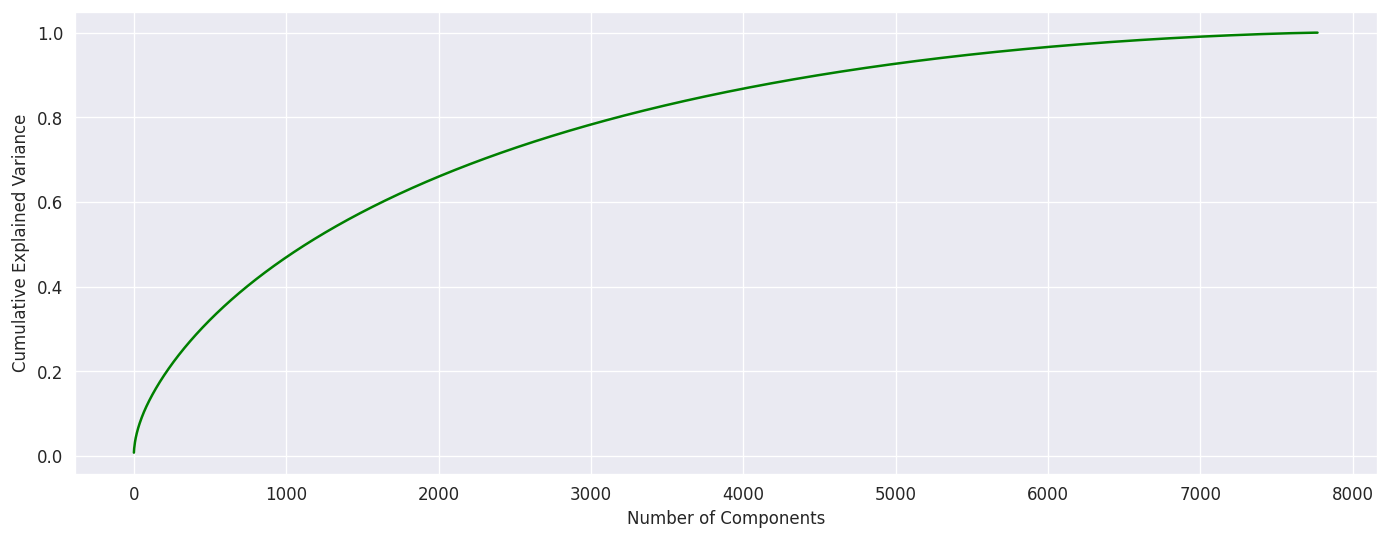

In [94]:
#figure with specified size and resolution
fig = plt.figure(figsize=(14,5), dpi=120)

#Plotting cumulative explained variance versus number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()



The plot above indicates that around 95% of the variance can be explained by utilizing 5000 components.
To avoid the complexity of choosing 5000 components, an alternative approach is to set the desired explained variance threshold to 95% using the built-in functionality in sklearn.

In [95]:
from sklearn.decomposition import PCA

#PCA object with 95% variance threshold
pca_tuned = PCA(n_components=0.95)

#Fitting PCA on the data and transform it
X_transformed = pca_tuned.fit_transform(X.toarray())

#shape of the transformed data
print("Transformed data shape:", X_transformed.shape)

Transformed data shape: (7770, 5538)


In [96]:
X_transformed

array([[ 1.15996649e-01, -3.41424552e-02, -3.35917606e-03, ...,
        -1.03733586e-02, -1.64457454e-03, -1.69043091e-03],
       [-4.44042706e-02, -4.09983062e-02,  2.91274232e-02, ...,
         7.33113424e-04, -4.95717098e-03, -2.42023917e-03],
       [-5.73724158e-02, -7.33925059e-02,  6.27926302e-03, ...,
        -1.49424768e-02, -3.11988936e-03, -5.94175177e-03],
       ...,
       [-5.40203474e-02,  1.84797100e-01,  1.17632958e-01, ...,
         6.59513020e-03, -1.35902989e-02, -1.42268468e-03],
       [ 1.04626918e-01,  1.15800069e-02, -1.78140703e-02, ...,
        -3.32700874e-03,  3.48699514e-03,  2.73920066e-04],
       [-3.27585017e-02,  3.80019629e-01,  1.13683798e-01, ...,
        -2.07012430e-03,  3.14158088e-03, -8.09865271e-04]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Utilized Principal Component Analysis (PCA) as a method for reducing the dimensionality of our data, enabling us to effectively capture the highest amount of variance with a reduced number of features.


Employed PCA to condense our data into a smaller set of features, allowing us to capture the most significant patterns and variability in the data while minimizing redundancy and information loss.

## ***7. ML Model Implementation***

# **Clustering Analysis**

 ## 1. **Silhoutte Score**

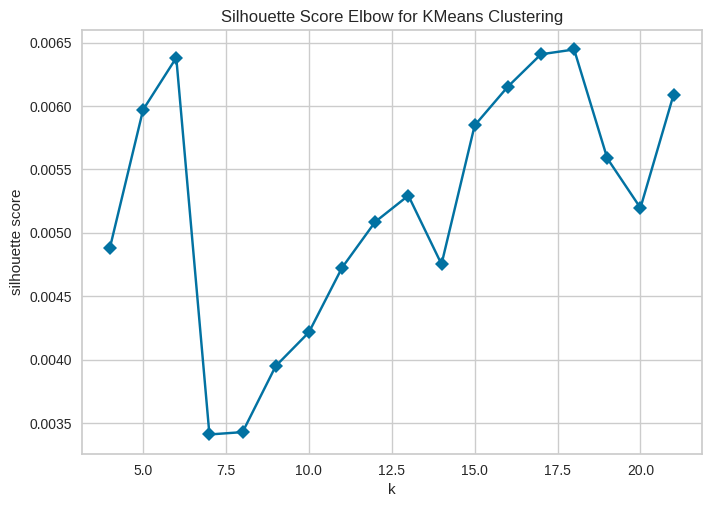

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [97]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#KMeans model with a specified random state
model = KMeans(random_state=5)

#Initializing the KElbowVisualizer with the model, range of k values, and evaluation metric
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

#Fitting the visualizer to the transformed data
visualizer.fit(X_transformed)

#Displaying elbow plot
visualizer.show()

In [98]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_score_analysis(n):
    # Loop through different number of clusters from 2 to n-1
    for n_clusters in range(2, n):
        # Create a KMeans object with n_clusters as the current iteration value
        km = KMeans(n_clusters=n_clusters, random_state=5)
        # Fit the KMeans model to the transformed data
        preds = km.fit_predict(X_transformed)
        centers = km.cluster_centers_
        
        #Calculating silhouette score using the transformed data and the predicted labels
        score = silhouette_score(X_transformed, preds, metric='euclidean')
        #Print the silhouette score for the current number of clusters
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

        #Create a SilhouetteVisualizer object with the KMeans model
        visualizer = SilhouetteVisualizer(km)

        #Fitting transformed data to the visualizer
        visualizer.fit(X_transformed) 
        #Displaying silhouette plot
        visualizer.poof() 

For n_clusters = 2, silhouette score is 0.004517263389683447


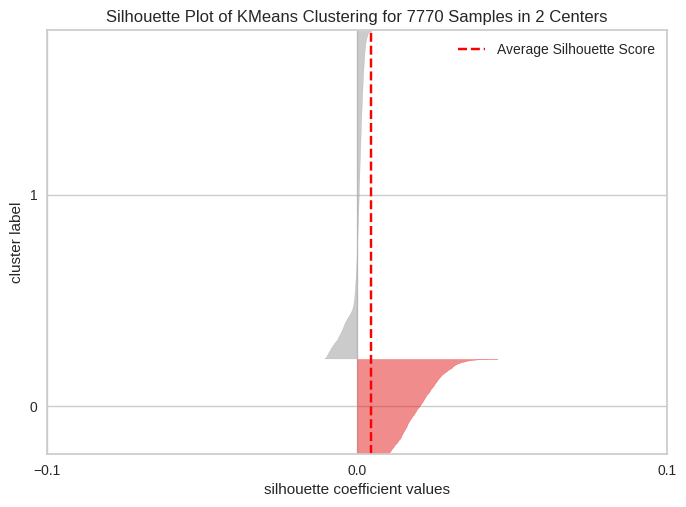

For n_clusters = 3, silhouette score is 0.003810926644877845


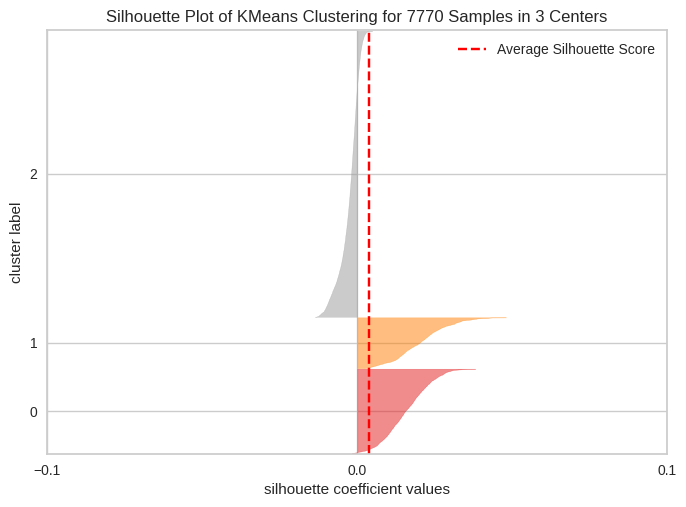

For n_clusters = 4, silhouette score is 0.004883649903012133


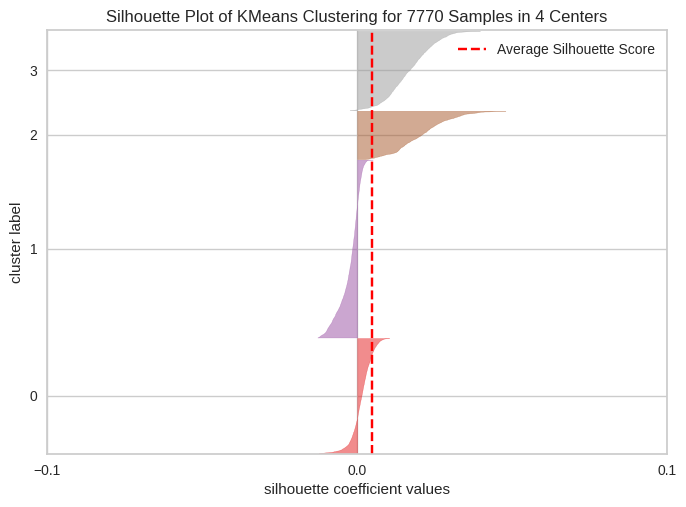

For n_clusters = 5, silhouette score is 0.00597147409215127


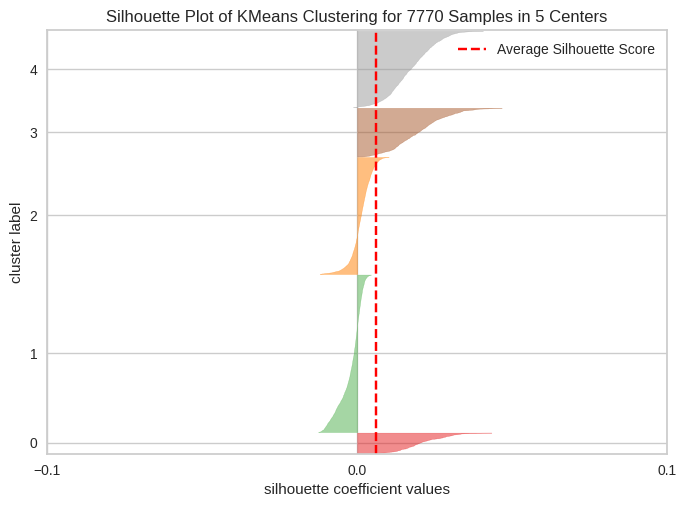

For n_clusters = 6, silhouette score is 0.0063815306257625345


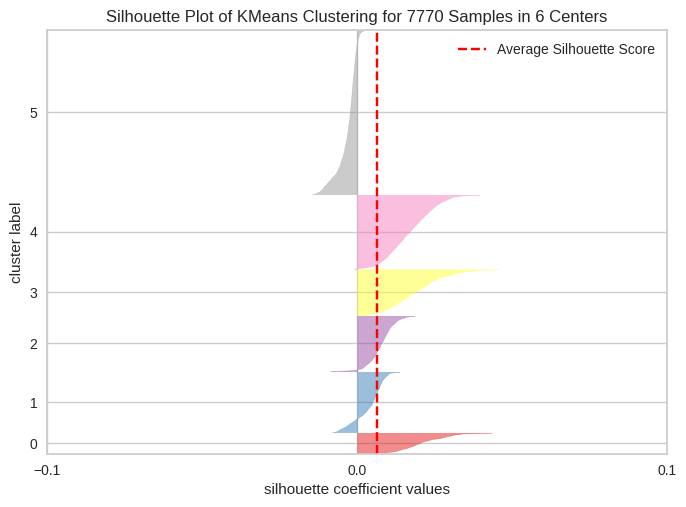

For n_clusters = 7, silhouette score is 0.0034092895050914576


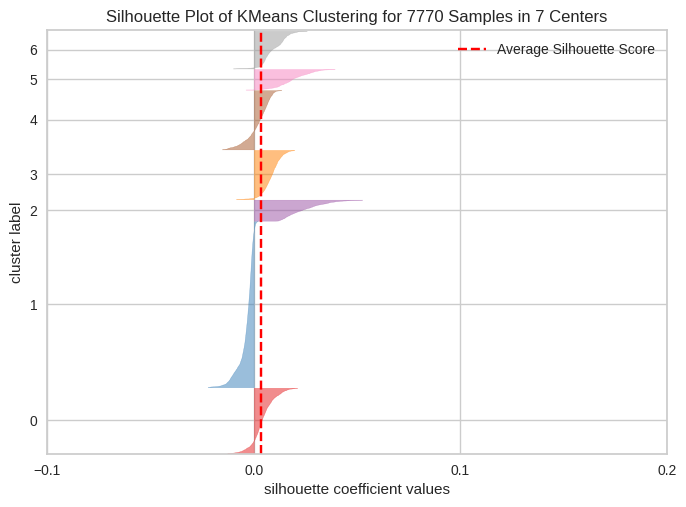

For n_clusters = 8, silhouette score is 0.003427902886816231


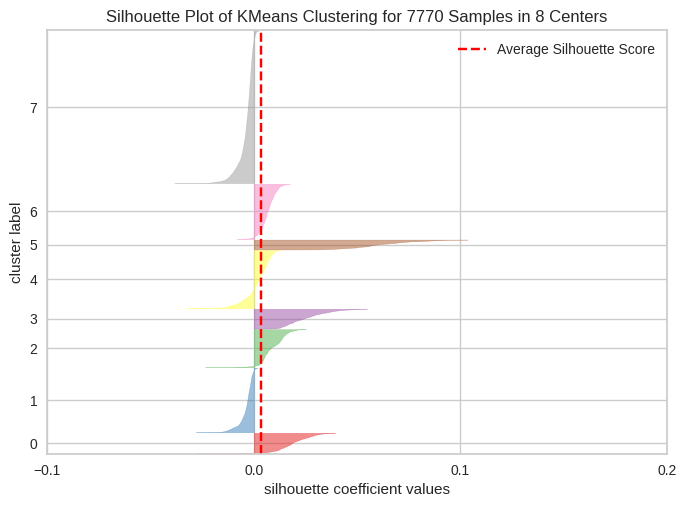

For n_clusters = 9, silhouette score is 0.003949227390028077


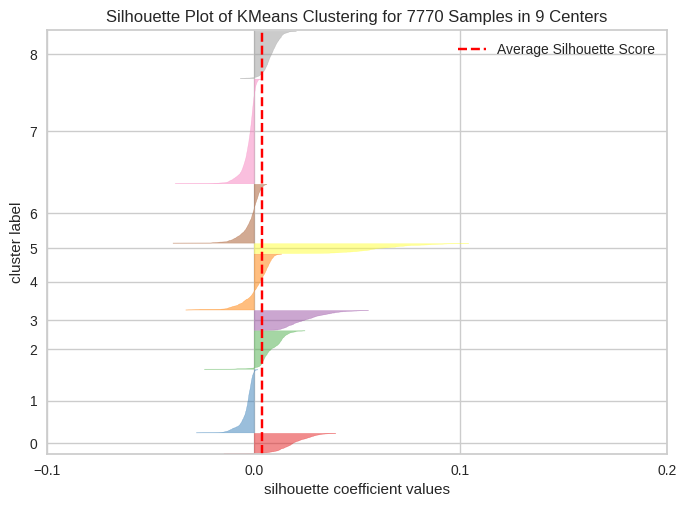

For n_clusters = 10, silhouette score is 0.004215109319334528


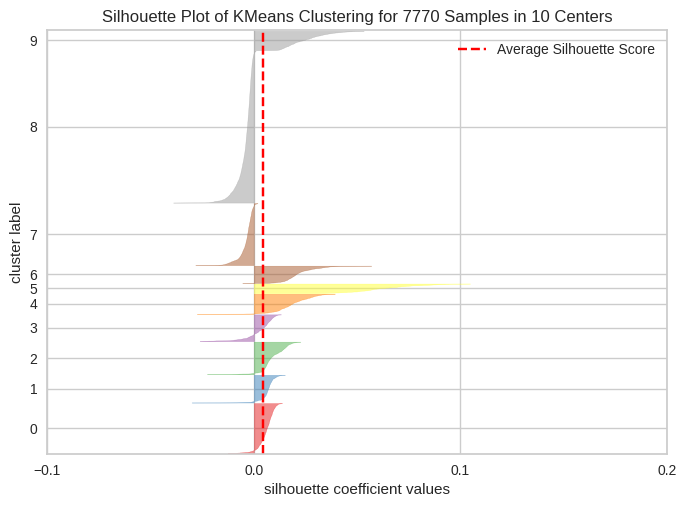

For n_clusters = 11, silhouette score is 0.004725070646997169


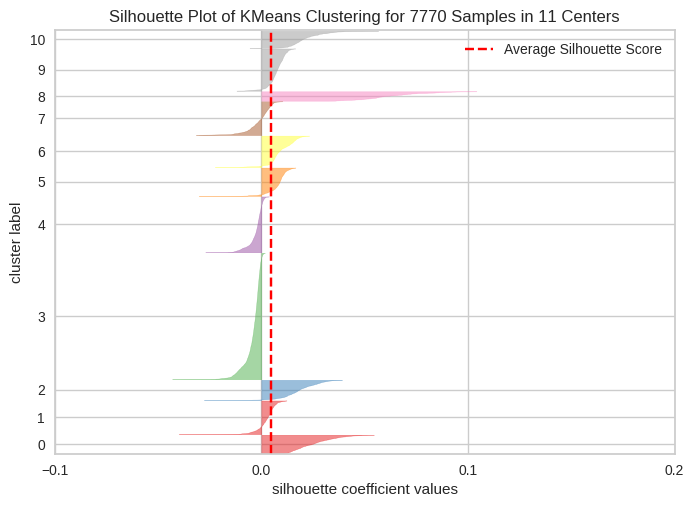

For n_clusters = 12, silhouette score is 0.0050866489644811426


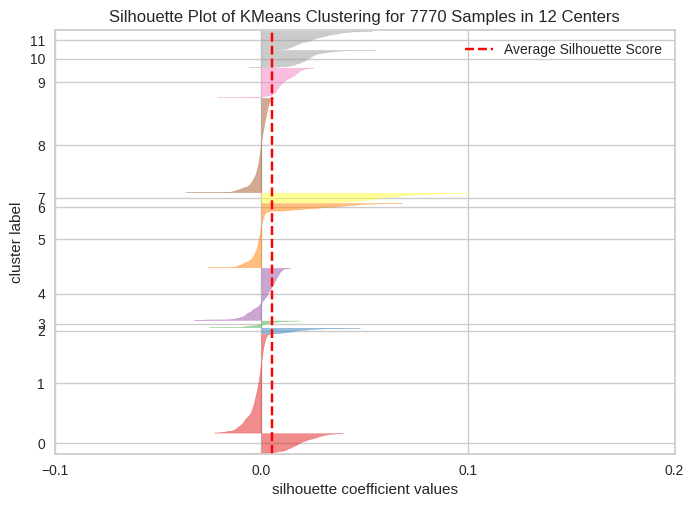

In [ ]:
silhouette_score_analysis(20)

Silhouette score serves as a measure to assess the effectiveness of clustering outcomes. It quantifies the similarity of an object to its respective cluster (cohesion) relative to other clusters (separation). The score falls within the range of -1 to 1, where higher values signify improved clustering performance.

 ## 2.  **Elbow Method**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
sum_of_sq_dist = {}
for k in range(1, 22):
km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
km = km.fit(X_transformed)
sum_of_sq_dist[k] = km.inertia_

# Customize plot style, size, design, and color
plt.figure(figsize=(8, 6)) # Set figure size
sns.set_style('darkgrid') # Set plot style
sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()), color='blue') # Set plot color

# Set plot labels and title
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Square Distances', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)

plt.show()

---------------
The elbow method is a popular approach for determining the ideal number of clusters in a dataset. It involves plotting the within-cluster sum of squares (WSS) against different numbers of clusters and identifying the "elbow" point on the graph. The elbow point signifies the point of diminishing returns, where further increasing the number of clusters does not significantly reduce the WSS. The optimal number of clusters is typically chosen as the one that corresponds to the lowest WSS score on the plot

-------------

---------------
After analyzing the plot of the within-cluster sum of squares (WSS) for different numbers of clusters, we have determined that 10 clusters would be an appropriate choice. Beyond this point, there is no significant improvement in the WSS, indicating diminishing returns in terms of increasing the number of clusters. Hence, we will proceed with 10 clusters for our analysis.

-------------

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=9)
kmeans.fit(X_transformed)

#Predicting labels of clusters.
label = kmeans.fit_predict(X_transformed)

#Getting unique labels.
unique_labels = np.unique(label)

#Plotting the results with custom style, size, design, and color.
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', 'h', 'x', '+']

plt.figure(figsize=(12,8))
for i in unique_labels:
plt.scatter(X_transformed[label == i , 0], X_transformed[label == i , 1], label=f'Cluster {i}', color=colors[i], marker=markers[i], s=80)
plt.legend()
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***